<a href="https://colab.research.google.com/github/thuongvan23/XAI-LandCover/blob/kienNB/lime12bands_bigearthnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd

# ƒê∆∞·ªùng d·∫´n t·ªõi th∆∞ m·ª•c ch·ª©a ·∫£nh (ƒë√£ gi·∫£i n√©n)
data_dir_1 = "/kaggle/input/bigearthnet-12band-10m/content/bigearthnet_12band_10m"
data_dir_2 = "/kaggle/input/bigearthnet-12band-10m-1/content/bigearthnet_12band_10m_1"
# ƒê∆∞·ªùng d·∫´n ƒë·∫øn file metadata.parquet ƒë√£ gi·∫£i n√©n
parquet_path = '/kaggle/input/bigearthnetv2-reference-maps/metadata.parquet'

# ƒê·ªçc file parquet
df = pd.read_parquet(parquet_path)

print(df.columns)

Index(['patch_id', 'labels', 'split', 'country', 's1_name', 's2v1_name',
       'contains_seasonal_snow', 'contains_cloud_or_shadow'],
      dtype='object')


In [ ]:
dir1 = "/kaggle/input/bigearthnet-12band-10m/content/bigearthnet_12band_10m"
dir2 = "/kaggle/input/bigearthnet-12band-10m-1/content/bigearthnet_12band_10m_1"

# L·∫•y t√™n c√°c class (t√™n th∆∞ m·ª•c con) t·ª´ c·∫£ 2 th∆∞ m·ª•c
classes_1 = set(os.listdir(dir1))
classes_2 = set(os.listdir(dir2))

all_classes = sorted(classes_1.union(classes_2))


print("T·ªïng s·ªë class:", len(all_classes))
print("Danh s√°ch class:")
for c in all_classes:
    print(c)

T·ªïng s·ªë class: 20
Danh s√°ch class:
S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP
S2A_MSIL2A_20170613T101031_N9999_R022_T34VER
S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU
S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK
S2A_MSIL2A_20170704T112111_N9999_R037_T29SND
S2A_MSIL2A_20170717T113321_N9999_R080_T29UPA
S2A_MSIL2A_20170717T113321_N9999_R080_T29UPV
S2A_MSIL2A_20170720T100031_N9999_R122_T34UDG
S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR
S2A_MSIL2A_20170813T112121_N9999_R037_T29SNC
S2A_MSIL2A_20170818T103021_N9999_R108_T32TMT
S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL
S2A_MSIL2A_20170905T095031_N9999_R079_T35WPN
S2A_MSIL2A_20171002T094031_N9999_R036_T34TCR
S2A_MSIL2A_20171002T094031_N9999_R036_T34TCS
S2A_MSIL2A_20171002T112111_N9999_R037_T29SNB
S2A_MSIL2A_20171002T112111_N9999_R037_T29SNC
S2A_MSIL2A_20171015T095031_N9999_R079_T33UXP
S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ
S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK


In [ ]:
df["labels"][15]

array(['Arable land', 'Broad-leaved forest', 'Inland waters', 'Pastures',
       'Urban fabric'], dtype=object)

In [ ]:
from collections import Counter
from itertools import chain

# Chu·ªói c√°c nh√£n ƒë∆∞·ª£c g·ªôp th√†nh 1 danh s√°ch l·ªõn (flattened list)
all_labels = list(chain.from_iterable(df['labels']))

# ƒê·∫øm t·∫ßn su·∫•t xu·∫•t hi·ªán c·ªßa t·ª´ng nh√£n
label_counts = Counter(all_labels)

# In ra s·ªë nh√£n duy nh·∫•t
print("S·ªë l∆∞·ª£ng nh√£n duy nh·∫•t:", len(label_counts))

# In ra danh s√°ch v√† s·ªë l·∫ßn xu·∫•t hi·ªán
print("\nT·∫ßn su·∫•t xu·∫•t hi·ªán c·ªßa t·ª´ng nh√£n:")
for label, count in label_counts.most_common():
    print(f"{label:40s}: {count}")

S·ªë l∆∞·ª£ng nh√£n duy nh·∫•t: 19

T·∫ßn su·∫•t xu·∫•t hi·ªán c·ªßa t·ª´ng nh√£n:
Arable land                             : 188025
Mixed forest                            : 165780
Coniferous forest                       : 154941
Transitional woodland, shrub            : 141150
Broad-leaved forest                     : 135928
Land principally occupied by agriculture, with significant areas of natural vegetation: 122709
Complex cultivation patterns            : 99598
Pastures                                : 95605
Urban fabric                            : 63758
Inland waters                           : 63212
Marine waters                           : 61832
Agro-forestry areas                     : 33181
Permanent crops                         : 29588
Inland wetlands                         : 20919
Moors, heathland and sclerophyllous vegetation: 13894
Natural grassland and sparsely vegetated areas: 11882
Industrial or commercial units          : 11142
Coastal wetlands                     

In [ ]:
import pandas as pd
import numpy as np

# ƒê·ªçc file metadata.parquet
parquet_path = '/kaggle/input/bigearthnetv2-reference-maps/metadata.parquet'
df = pd.read_parquet(parquet_path)

# Danh s√°ch 19 l·ªõp chu·∫©n
class_list = [
    'Arable land',
    'Mixed forest',
    'Coniferous forest',
    'Transitional woodland, shrub',
    'Broad-leaved forest',
    'Land principally occupied by agriculture, with significant areas of natural vegetation',
    'Complex cultivation patterns',
    'Pastures',
    'Urban fabric',
    'Inland waters',
    'Marine waters',
    'Agro-forestry areas',
    'Permanent crops',
    'Inland wetlands',
    'Moors, heathland and sclerophyllous vegetation',
    'Natural grassland and sparsely vegetated areas',
    'Industrial or commercial units',
    'Coastal wetlands',
    'Beaches, dunes, sands'
]

# T·∫°o √°nh x·∫° t·ª´ t√™n nh√£n sang ch·ªâ s·ªë
label_to_idx = {label: i for i, label in enumerate(class_list)}

# H√†m chuy·ªÉn danh s√°ch nh√£n th√†nh vector 19 chi·ªÅu
def encode_labels(label_list):
    vec = np.zeros(len(class_list), dtype=int)
    for label in label_list:
        if label in label_to_idx:
            vec[label_to_idx[label]] = 1
    return vec.tolist()

# Ghi ƒë√® c·ªôt 'labels' b·∫±ng vector 19 chi·ªÅu (multi-hot)
df['labels'] = df['labels'].apply(encode_labels)

# Ki·ªÉm tra k·∫øt qu·∫£
print(df.head())

# (T√πy ch·ªçn) L∆∞u l·∫°i file parquet ho·∫∑c CSV
df.to_parquet('metadata_multilabel_encoded.parquet')

                                            patch_id  \
0  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
1  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
2  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
3  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
4  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   

                                              labels split  country  \
0  [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...  test  Austria   
1  [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
2  [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
3  [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
4  [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   

                                        s1_name  \
0  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57   
1  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55   
2  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56   
3  S1B_IW_GRDH_1SDV_20170612T165

In [ ]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [ ]:
import os

# Danh s√°ch th∆∞ m·ª•c ch·ª©a dataset
data_dirs = [
    "/kaggle/input/bigearthnet-12band-10m/content/bigearthnet_12band_10m",
    "/kaggle/input/bigearthnet-12band-10m-1/content/bigearthnet_12band_10m_1"
]

class_counts = {}
total_images = 0

for data_dir in data_dirs:
    for label in sorted(os.listdir(data_dir)):
        class_path = os.path.join(data_dir, label)
        if os.path.isdir(class_path):
            n_files = len([f for f in os.listdir(class_path) if f.endswith('.tif')])
            if label not in class_counts:
                class_counts[label] = 0
            class_counts[label] += n_files
            total_images += n_files

# In k·∫øt qu·∫£
print("S·ªë l∆∞·ª£ng ·∫£nh m·ªói class (g·ªôp c·∫£ 2 dataset):")
for label, count in class_counts.items():
    print(f"Class {label}: {count} ·∫£nh")

print(f"\nT·ªïng s·ªë ·∫£nh: {total_images}")

S·ªë l∆∞·ª£ng ·∫£nh m·ªói class (g·ªôp c·∫£ 2 dataset):
Class S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP: 3305 ·∫£nh
Class S2A_MSIL2A_20170613T101031_N9999_R022_T34VER: 6686 ·∫£nh
Class S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU: 7986 ·∫£nh
Class S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK: 7997 ·∫£nh
Class S2A_MSIL2A_20170704T112111_N9999_R037_T29SND: 8216 ·∫£nh
Class S2A_MSIL2A_20170717T113321_N9999_R080_T29UPA: 370 ·∫£nh
Class S2A_MSIL2A_20170717T113321_N9999_R080_T29UPV: 6013 ·∫£nh
Class S2A_MSIL2A_20170720T100031_N9999_R122_T34UDG: 1540 ·∫£nh
Class S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR: 4864 ·∫£nh
Class S2A_MSIL2A_20170813T112121_N9999_R037_T29SNC: 8222 ·∫£nh
Class S2A_MSIL2A_20170818T103021_N9999_R108_T32TMT: 4888 ·∫£nh
Class S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL: 8229 ·∫£nh
Class S2A_MSIL2A_20170905T095031_N9999_R079_T35WPN: 2292 ·∫£nh
Class S2A_MSIL2A_20171002T094031_N9999_R036_T34TCR: 4864 ·∫£nh
Class S2A_MSIL2A_20171002T094031_N9999_R036_T34TCS: 627 ·∫£nh
C

In [ ]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [ ]:
!pip install rasterio

Shape c·ªßa ·∫£nh S2A_MSIL2A_20170818T103021_N9999_R108_T32TMT_20_36_12band.tif: (12, 120, 120) (channels, height, width)


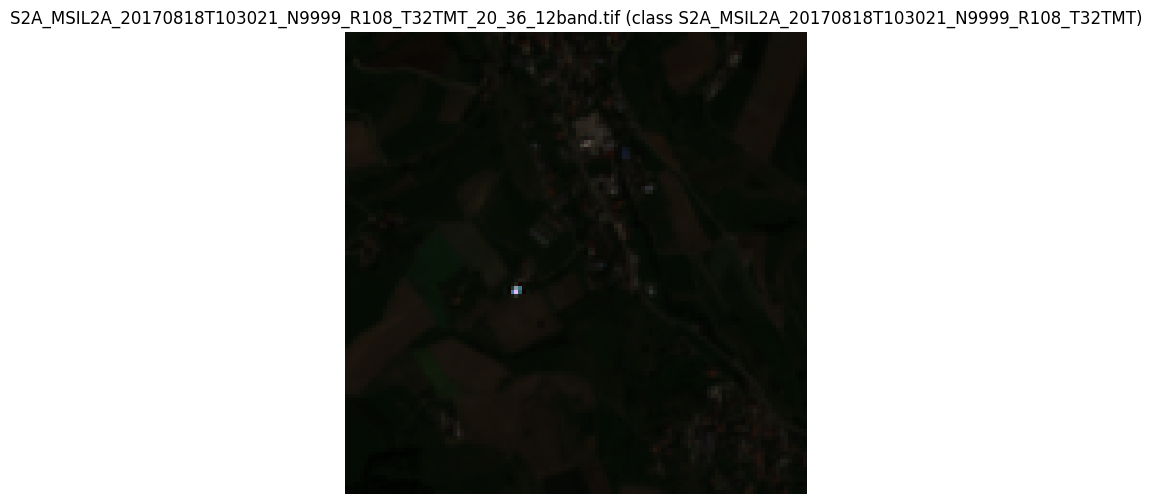

In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import random

# Ch·ªçn ng·∫´u nhi√™n 1 class v√† 1 ·∫£nh trong class
random_class = random.choice(os.listdir(data_dir))
img_path = os.path.join(data_dir, random_class)
random_img = random.choice([f for f in os.listdir(img_path) if f.endswith('.tif')])
img_full_path = os.path.join(img_path, random_img)

# ƒê·ªçc ·∫£nh
with rasterio.open(img_full_path) as src:
    img = src.read()  # shape: (12, H, W)

# In shape
print(f"Shape c·ªßa ·∫£nh {random_img}: {img.shape} (channels, height, width)")

# Hi·ªÉn th·ªã ·∫£nh (d√πng band 4,3,2 t∆∞∆°ng ·ª©ng RGB)
rgb = np.stack([img[3], img[2], img[1]], axis=-1)  # Ch√∫ √Ω ch·ªâ s·ªë b·∫Øt ƒë·∫ßu t·ª´ 0
rgb = rgb.astype(np.float32)
rgb /= np.max(rgb) + 1e-6  # Chu·∫©n h√≥a ƒë·ªÉ hi·ªÉn th·ªã

plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"{random_img} (class {random_class})")
plt.axis('off')
plt.show()

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from glob import glob

# 1. Danh s√°ch th∆∞ m·ª•c ch·ª©a ·∫£nh
IMAGE_DIRS = [
    "/kaggle/input/bigearthnet-12band-10m/content/bigearthnet_12band_10m",
    "/kaggle/input/bigearthnet-12band-10m-1/content/bigearthnet_12band_10m_1"
]


# 2. ƒê·ªçc metadata ch·ª©a patch_id v√† labels
# df = pd.read_parquet('/kaggle/input/bigearthnetv2-reference-maps/metadata.parquet')

# 3. G·ªôp to√†n b·ªô ·∫£nh t·ª´ nhi·ªÅu th∆∞ m·ª•c
tif_paths = []
for image_dir in IMAGE_DIRS:
    tif_paths.extend(glob(os.path.join(image_dir, "*", "*_12band.tif")))

# 4. T·∫°o √°nh x·∫° patch_id ‚Üí ƒë∆∞·ªùng d·∫´n ·∫£nh
patch_to_path = {
    os.path.basename(path).replace("_12band.tif", ""): path
    for path in tif_paths
}

# 5. Gi·ªØ l·∫°i c√°c patch_id c√≥ ·∫£nh th·∫≠t s·ª±
df = df[df['patch_id'].isin(patch_to_path)]

# 6. G√°n c·ªôt image_path theo √°nh x·∫° t√¨m ƒë∆∞·ª£c
df['image_path'] = df['patch_id'].map(patch_to_path)

# 7. Chia ng·∫´u nhi√™n train/val/test (70/15/15)
train_val_df, test_df = train_test_split(df, test_size=0.15, random_state=42, shuffle=True)
train_df, val_df = train_test_split(train_val_df, test_size=0.1765, random_state=42)

# 8. T·∫°o danh s√°ch (image_path, labels)
train_list = list(zip(train_df['image_path'], train_df['labels']))
val_list = list(zip(val_df['image_path'], val_df['labels']))
test_list = list(zip(test_df['image_path'], test_df['labels']))

# 9. In k·∫øt qu·∫£
print(f"S·ªë ·∫£nh train: {len(train_list)}")
print(f"S·ªë ·∫£nh val:   {len(val_list)}")
print(f"S·ªë ·∫£nh test:  {len(test_list)}")

S·ªë ·∫£nh train: 71741
S·ªë ·∫£nh val:   15377
S·ªë ·∫£nh test:  15374


In [ ]:
len(tif_paths)

112210

In [ ]:
train_list[0]

('/kaggle/input/bigearthnet-12band-10m/content/bigearthnet_12band_10m/S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR/S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR_64_29_12band.tif',
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Ki·ªÉm tra nh·ªØng ·∫£nh KH√îNG c√≥ trong metadata
tif_patch_ids = set([os.path.basename(p).replace('_12band.tif', '') for p in tif_paths])
metadata_patch_ids = set(df['patch_id'].tolist())

missing_from_metadata = tif_patch_ids - metadata_patch_ids
print(f"S·ªë ·∫£nh KH√îNG c√≥ metadata: {len(missing_from_metadata)}")

S·ªë ·∫£nh KH√îNG c√≥ metadata: 9718


In [ ]:
# S·ªë ·∫£nh th·ª±c s·ª± trong th∆∞ m·ª•c
print("T·ªïng s·ªë file ·∫£nh .tif:", len(tif_paths))

# S·ªë patch_id c√≥ metadata
print("T·ªïng s·ªë patch_id trong metadata:", len(df))

# S·ªë ·∫£nh t·ªìn t·∫°i ƒë·ªìng th·ªùi c·∫£ trong th∆∞ m·ª•c v√† metadata
common_ids = set(df['patch_id']).intersection(set(patch_to_path))
print("S·ªë patch_id kh·ªõp ƒë∆∞·ª£c c·∫£ metadata v√† ·∫£nh:", len(common_ids))

T·ªïng s·ªë file ·∫£nh .tif: 112210
T·ªïng s·ªë patch_id trong metadata: 102492
S·ªë patch_id kh·ªõp ƒë∆∞·ª£c c·∫£ metadata v√† ·∫£nh: 102492


In [ ]:
!pip install albumentations

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_transform = A.Compose([
    # A.Normalize(mean=[0]*12, std=[1]*12, max_pixel_value=1.0),

    A.Resize(244, 224),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.Normalize(mean=0.0, std=1.0, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=True),
])

val_transform = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=[0]*12, std=[1]*12, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=False)
])

/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/usr/local/lib/python3.11/dist-packages/albumentations/augmentations/pixel/transforms.py:228: RuntimeWarning: divide by zero encountered in reciprocal
  self.denominator = np.reciprocal(


In [ ]:
from torch.utils.data import Dataset
import torch
import numpy as np
import rasterio  # d√πng rasterio ch·ª© kh√¥ng c·∫ßn tifffile n·∫øu b·∫°n d√πng .open()

class BigEarthNetDataset(Dataset):
    def __init__(self, data_list, transform=None):
        self.data_list = data_list  # List of (img_path, label_list)
        self.transform = transform

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        img_path, label = self.data_list[idx]

        with rasterio.open(img_path) as src:
            image = src.read()  # (13, H, W)

        image = image.astype(np.float32) / 10000.0
        image = np.transpose(image, (1, 2, 0))  # (H, W, C)

        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        else:
            image = torch.tensor(np.transpose(image, (2, 0, 1)), dtype=torch.float32)

        # Chuy·ªÉn label th√†nh Tensor float cho multi-label
        label = torch.tensor(label, dtype=torch.float32)

        return image, label

In [ ]:
from torch.utils.data import DataLoader

# Batch size
BATCH_SIZE = 64

# Dataset
train_dataset = BigEarthNetDataset(train_list, transform=train_transform)
val_dataset = BigEarthNetDataset(val_list, transform=val_transform)
test_dataset = BigEarthNetDataset(test_list, transform=val_transform)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Label Tensor: tensor([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0.])
Shape: torch.Size([19])
Non-zero class indices: [0, 4, 7, 11]
Non-zero class count: 4.0


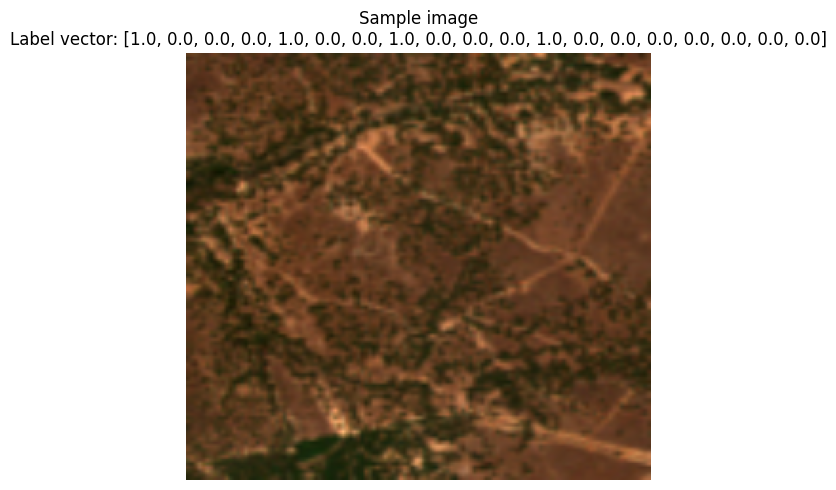

In [ ]:
# L·∫•y 1 m·∫´u b·∫•t k·ª≥ t·ª´ train_dataset
sample_img, sample_label = train_dataset[1]

#Ki·ªÉm tra th√¥ng tin label
print("Label Tensor:", sample_label)
print("Shape:", sample_label.shape)
print("Non-zero class indices:", torch.nonzero(sample_label).squeeze().tolist())
print("Non-zero class count:", torch.sum(sample_label).item())

# Chuy·ªÉn tensor v·ªÅ numpy ƒë·ªÉ hi·ªÉn th·ªã
sample_img_np = sample_img.numpy().transpose(1, 2, 0)  # (H, W, C)

# L·∫•y l·∫°i c√°c band RGB (band 4, 3, 2 --> index 3, 2, 1)
rgb = sample_img_np[:, :, [3, 2, 1]]

# Chu·∫©n h√≥a v·ªÅ [0, 1] n·∫øu c·∫ßn (n·∫øu b·∫°n ƒë√£ normalize th√¨ gi√° tr·ªã c√≥ th·ªÉ l·ªách)
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)

# Hi·ªÉn th·ªã ·∫£nh
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"Sample image\nLabel vector: {sample_label.tolist()}")
plt.axis("off")
plt.show()

In [ ]:
pip install efficientnet_pytorch

Note: you may need to restart the kernel to use updated packages.


Using device: cpu
Model loaded and moved to cpu
True Labels (binary vector):
 [1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [ -1.00353  -3.16369  -5.11462  -6.15549  -5.14274  -3.34869  -0.38706
   0.16501   0.20137   7.24471 -10.38685 -10.01695  -6.70208  -5.73178
 -10.20974  -9.01686  -4.88785 -16.30918 -12.2108 ]
Sigmoid(Logits):
 [0.26825 0.04056 0.00597 0.00212 0.00581 0.03394 0.40443 0.54116 0.55017
 0.99929 0.00003 0.00004 0.00123 0.00323 0.00004 0.00012 0.00748 0.
 0.     ]
Predicted Labels:
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


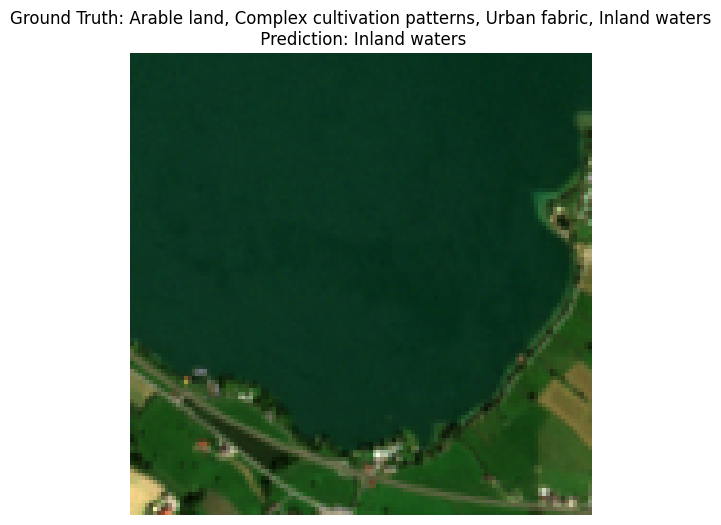

True Labels (binary vector):
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [ -0.63112  -3.72049  -3.96177  -4.07642  -3.82099  -1.79321  -1.73293
   3.92627   6.27321  -5.71256  -7.13894 -10.78632  -6.40784  -3.13153
  -4.8581   -5.26688  -2.04497  -5.79414  -7.35099]
Sigmoid(Logits):
 [0.34726 0.02365 0.01867 0.01669 0.02144 0.14268 0.15021 0.98066 0.99812
 0.00329 0.00079 0.00002 0.00165 0.04183 0.00771 0.00513 0.11456 0.00304
 0.00064]
Predicted Labels:
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]


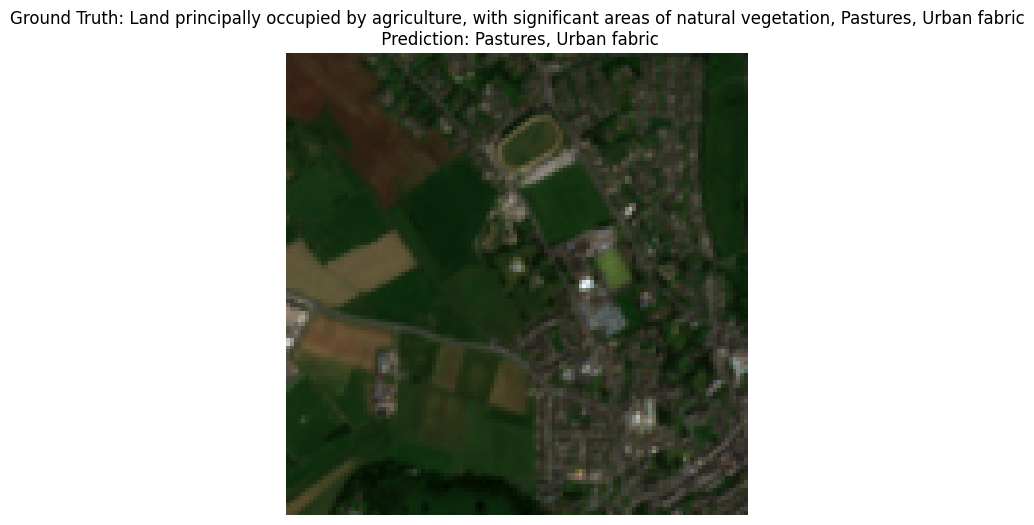

True Labels (binary vector):
 [1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [  5.51516  -3.93149  -7.9316   -5.6465    5.15996  -0.95325  -3.17816
  -4.87255   7.7998   -5.66655 -23.20754 -16.92367  -2.2389   -9.55634
 -14.57193  -8.93375  -4.02307 -20.39011 -32.60024]
Sigmoid(Logits):
 [0.99599 0.01924 0.00036 0.00352 0.99429 0.27823 0.04    0.0076  0.99959
 0.00345 0.      0.      0.09631 0.00007 0.      0.00013 0.01758 0.
 0.     ]
Predicted Labels:
 [1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


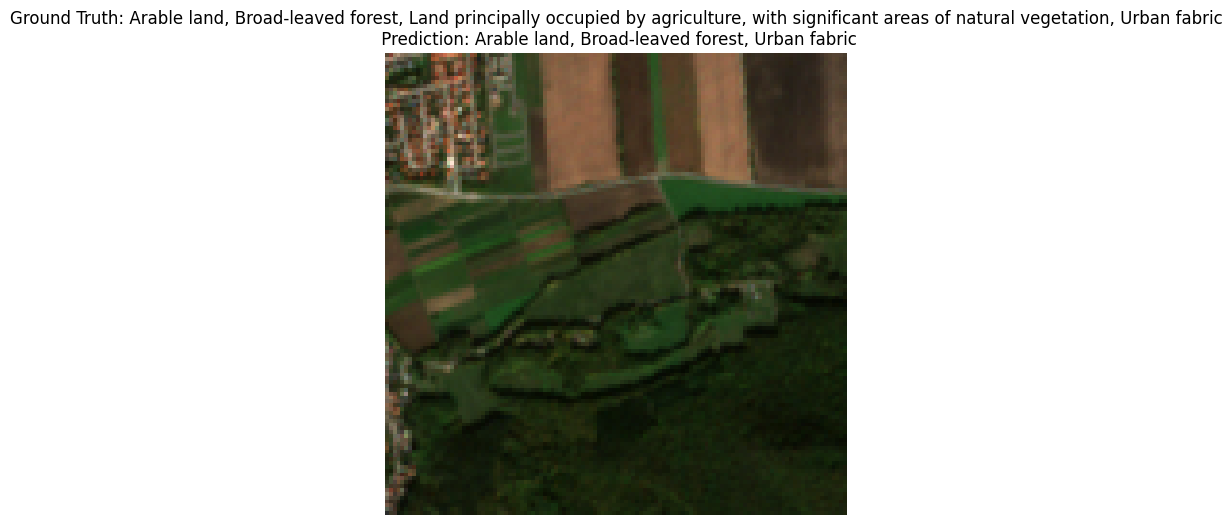

True Labels (binary vector):
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [ -5.02008   1.85696   5.26421  -0.508    -3.8402   -4.23791 -12.64146
 -13.28127  -8.62761  -3.72572 -12.21113 -14.89173 -13.98076  -5.25785
 -15.68808 -15.99572 -10.37475 -17.17752 -19.58798]
Sigmoid(Logits):
 [0.00656 0.86494 0.99485 0.37566 0.02104 0.01423 0.      0.      0.00018
 0.02353 0.      0.      0.      0.00518 0.      0.      0.00003 0.
 0.     ]
Predicted Labels:
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


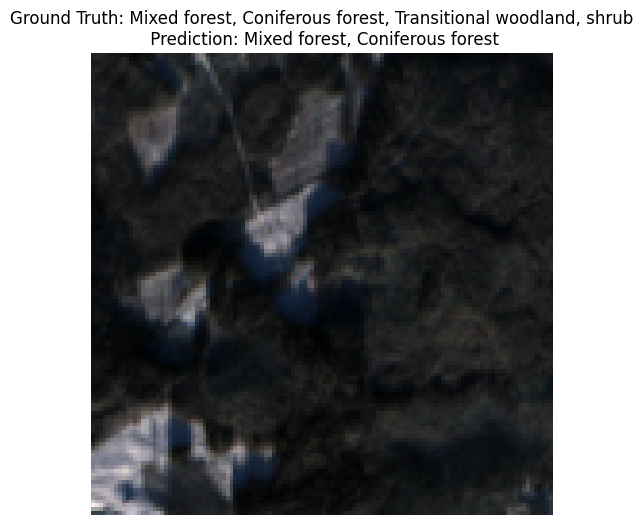

True Labels (binary vector):
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [ 11.79372 -14.11049 -14.99229  -5.99128  -7.45529  -6.31996  -6.73765
  -8.57481  -8.04874  -9.24316 -22.66353 -13.81466  -7.59607  -8.17
 -16.86072 -11.26116  -6.66397 -30.24043 -29.19648]
Sigmoid(Logits):
 [0.99999 0.      0.      0.00249 0.00058 0.0018  0.00118 0.00019 0.00032
 0.0001  0.      0.      0.0005  0.00028 0.      0.00001 0.00127 0.
 0.     ]
Predicted Labels:
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


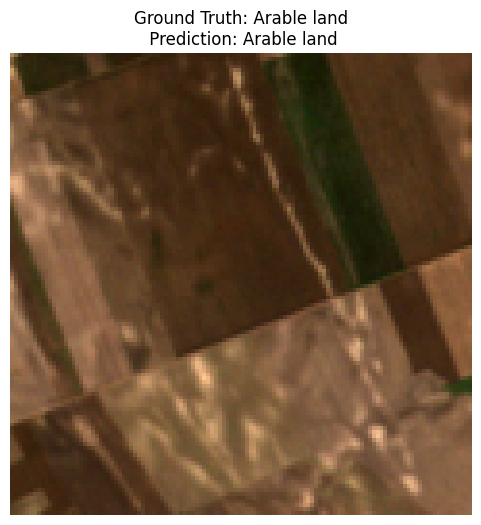

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import random

# Lu√¥n d√πng CPU
device = torch.device("cpu")
print("Using device:", device)

# Load model EfficientNet ƒë√£ hu·∫•n luy·ªán (tr√™n CPU)
model_path = "/kaggle/input/efficientnet-v3/t-capstone-process-bigearth-nhan-efficientnet-v3.pth"
model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()
print("Model loaded and moved to", device)

# Danh s√°ch class BigEarthNet
class_list = [
    'Arable land',
    'Mixed forest',
    'Coniferous forest',
    'Transitional woodland, shrub',
    'Broad-leaved forest',
    'Land principally occupied by agriculture, with significant areas of natural vegetation',
    'Complex cultivation patterns',
    'Pastures',
    'Urban fabric',
    'Inland waters',
    'Marine waters',
    'Agro-forestry areas',
    'Permanent crops',
    'Inland wetlands',
    'Moors, heathland and sclerophyllous vegetation',
    'Natural grassland and sparsely vegetated areas',
    'Industrial or commercial units',
    'Coastal wetlands',
    'Beaches, dunes, sands'
]

# H√†m hi·ªÉn th·ªã prediction
def show_sample_prediction(dataset, index):
    image, true_labels = dataset[index]
    input_tensor = image.unsqueeze(0).to(device)  # (1, C, H, W)

    np.set_printoptions(suppress=True, precision=5)
    # D·ª± ƒëo√°n
    with torch.no_grad():
        output = model(input_tensor)
        sigmoid_probs = torch.sigmoid(output.squeeze()).cpu().numpy()
        predicted = (sigmoid_probs > 0.8).astype(int)  # S·ª≠a ch·ªó n√†y

    # Hi·ªÉn th·ªã ma tr·∫≠n nh√£n g·ªëc v√† predicted
    print("True Labels (binary vector):\n", true_labels.numpy())
    print("Logits:\n", output.squeeze().cpu().numpy())
    print("Sigmoid(Logits):\n", np.array2string(sigmoid_probs, precision=5, suppress_small=True))
    print("Predicted Labels:\n", predicted)

    # L·∫•y t√™n nh√£n
    true_label_names = [class_list[i] for i, val in enumerate(true_labels) if val == 1]
    predicted_label_names = [class_list[i] for i, val in enumerate(predicted) if val == 1]

    # Hi·ªÉn th·ªã ·∫£nh (ch·ªçn RGB bands 4,3,2)
    img_np = image.cpu().numpy().transpose(1, 2, 0)
    rgb = img_np[:, :, [3, 2, 1]]  # Bands 4,3,2
    rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)  # Scale v·ªÅ [0,1]

    plt.figure(figsize=(6, 6))
    plt.imshow(rgb)
    plt.axis('off')
    plt.title("Ground Truth: {}\n Prediction: {}".format(", ".join(true_label_names), ", ".join(predicted_label_names)))
    plt.show()

# Hi·ªÉn th·ªã 5 m·∫´u random t·ª´ test_dataset
for _ in range(5):
    idx = random.randint(0, len(test_dataset) - 1)
    show_sample_prediction(test_dataset, idx)

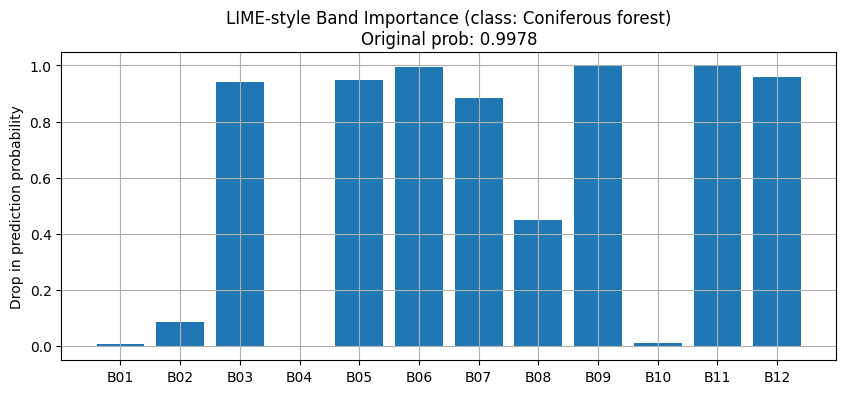

Ground truth labels: ['Coniferous forest', 'Inland waters', 'Inland wetlands']
Target class explained: Coniferous forest
Band importance values:
 [ 0.00719  0.08685  0.942   -0.00117  0.94937  0.99285  0.88224  0.4503
  0.99698  0.01059  0.99672  0.95975]


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# ‚úÖ H√†m: che band (g√°n v·ªÅ 0 ho·∫∑c gi√° tr·ªã trung b√¨nh)
def mask_band(image, band_idx, method='zero'):
    masked = image.clone()
    if method == 'zero':
        masked[band_idx] = 0
    elif method == 'mean':
        masked[band_idx] = image[band_idx].mean()
    return masked

# ‚úÖ H√†m: t√≠nh t·∫ßm quan tr·ªçng t·ª´ng band
def compute_band_importance(model, image, true_labels, target_class=None, method='zero'):
    model.eval()
    image = image.to(device)

    # L·∫•y x√°c su·∫•t d·ª± ƒëo√°n ban ƒë·∫ßu (cho nh√£n m·ª•c ti√™u)
    with torch.no_grad():
        original_logits = model(image.unsqueeze(0))
        original_probs = torch.sigmoid(original_logits.squeeze()).cpu().numpy()

    # N·∫øu ch∆∞a ch·ªâ ƒë·ªãnh nh√£n, l·∫•y nh√£n ƒë·∫ßu ti√™n trong ground-truth
    if target_class is None:
        target_class = torch.where(true_labels == 1)[0][0].item()

    base_prob = original_probs[target_class]

    importances = []
    for band_idx in range(image.shape[0]):
        masked = mask_band(image, band_idx, method=method)
        with torch.no_grad():
            logits = model(masked.unsqueeze(0))
            probs = torch.sigmoid(logits.squeeze()).cpu().numpy()
            drop = base_prob - probs[target_class]
            importances.append(drop)

    return np.array(importances), target_class, base_prob

# ‚úÖ H√†m: hi·ªÉn th·ªã k·∫øt qu·∫£ LIME-like
def show_band_importance(model, dataset, index, method='zero'):
    image, label = dataset[index]
    importances, target_class, base_prob = compute_band_importance(model, image, label, method=method)

    band_names = [f'B{i+1:02d}' for i in range(image.shape[0])]
    plt.figure(figsize=(10, 4))
    plt.bar(band_names, importances)
    plt.ylabel('Drop in prediction probability')
    plt.title(f'LIME-style Band Importance (class: {class_list[target_class]})\nOriginal prob: {base_prob:.4f}')
    plt.grid(True)
    plt.show()

    print("Ground truth labels:", [class_list[i] for i, v in enumerate(label) if v == 1])
    print("Target class explained:", class_list[target_class])
    print("Band importance values:\n", importances)
show_band_importance(model, test_dataset, index=0)

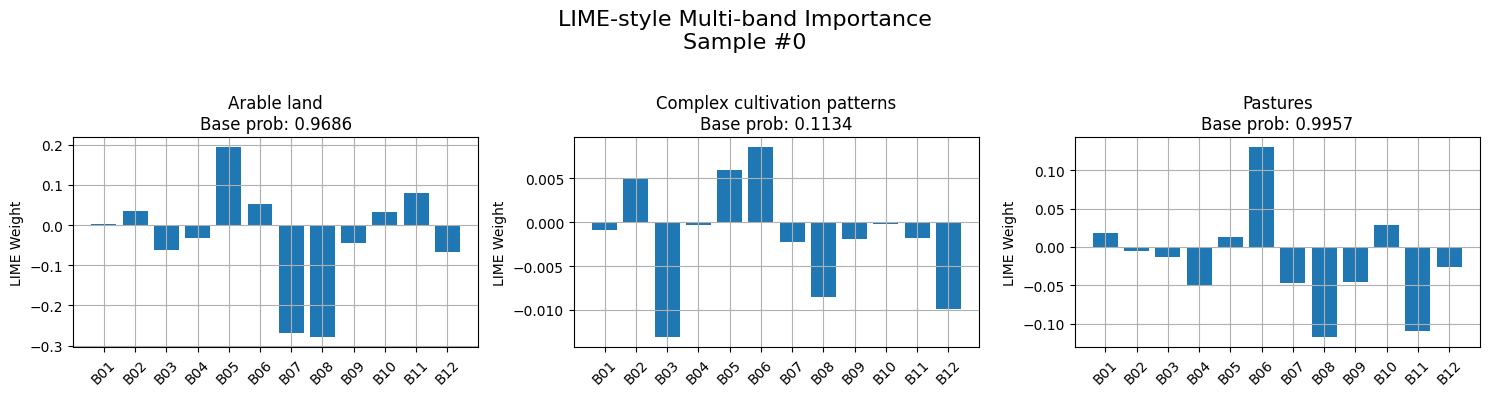

Ground truth labels: ['Arable land', 'Complex cultivation patterns', 'Pastures']


In [ ]:
import torch
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

def lime_multi_band_importance(model, image, true_label, target_class=None, num_samples=500, method='zero'):
    model.eval()
    image = image.to(device)

    # N·∫øu kh√¥ng ch·ªâ ƒë·ªãnh class ‚Üí l·∫•y nh√£n ƒë·∫ßu ti√™n trong ground truth
    if target_class is None:
        target_class = torch.where(true_label == 1)[0][0].item()

    # D·ª± ƒëo√°n x√°c su·∫•t g·ªëc
    with torch.no_grad():
        base_prob = torch.sigmoid(model(image.unsqueeze(0)))[0, target_class].item()

    C = image.shape[0]  # s·ªë bands, v√≠ d·ª• 12
    masks = []
    probs = []

    for _ in range(num_samples):
        # Mask vector: 1 gi·ªØ nguy√™n, 0 l√† che
        band_mask = np.random.randint(0, 2, size=C)
        masked_image = image.clone()

        for i in range(C):
            if band_mask[i] == 0:
                if method == 'zero':
                    masked_image[i] = 0
                elif method == 'mean':
                    masked_image[i] = image[i].mean()

        with torch.no_grad():
            prob = torch.sigmoid(model(masked_image.unsqueeze(0)))[0, target_class].item()

        masks.append(band_mask)
        probs.append(prob)

    # Chuy·ªÉn v·ªÅ array
    masks = np.array(masks)  # shape (num_samples, C)
    probs = np.array(probs)  # shape (num_samples,)

    # T√≠nh Y: ch√™nh l·ªách x√°c su·∫•t so v·ªõi g·ªëc (gi·∫£m bao nhi√™u)
    y = base_prob - probs

    # H·ªìi quy tuy·∫øn t√≠nh (Ridge ƒë·ªÉ ·ªïn ƒë·ªãnh)
    reg = Ridge(alpha=1.0)
    reg.fit(masks, y)
    band_importances = reg.coef_

    return band_importances, target_class, base_prob
def show_lime_multi_band(model, dataset, index, num_samples=500, method='zero', class_indices=None):
    image, label = dataset[index]

    # N·∫øu kh√¥ng ch·ªâ ƒë·ªãnh, gi·∫£i th√≠ch cho t·∫•t c·∫£ nh√£n ground-truth
    if class_indices is None:
        class_indices = torch.where(label == 1)[0].tolist()

    band_names = [f'B{i+1:02d}' for i in range(image.shape[0])]
    n_classes = len(class_indices)
    n_cols = min(n_classes, 3)
    n_rows = (n_classes + n_cols - 1) // n_cols

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, class_idx in enumerate(class_indices):
        importances, _, base_prob = lime_multi_band_importance(model, image, label, target_class=class_idx,
                                                                num_samples=num_samples, method=method)
        plt.subplot(n_rows, n_cols, i + 1)
        plt.bar(band_names, importances)
        plt.title(f"{class_list[class_idx]}\nBase prob: {base_prob:.4f}")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.ylabel("LIME Weight")

    plt.suptitle(f"LIME-style Multi-band Importance\nSample #{index}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    print("Ground truth labels:", [class_list[i] for i, v in enumerate(label) if v == 1])
show_lime_multi_band(model, test_dataset, index=0)

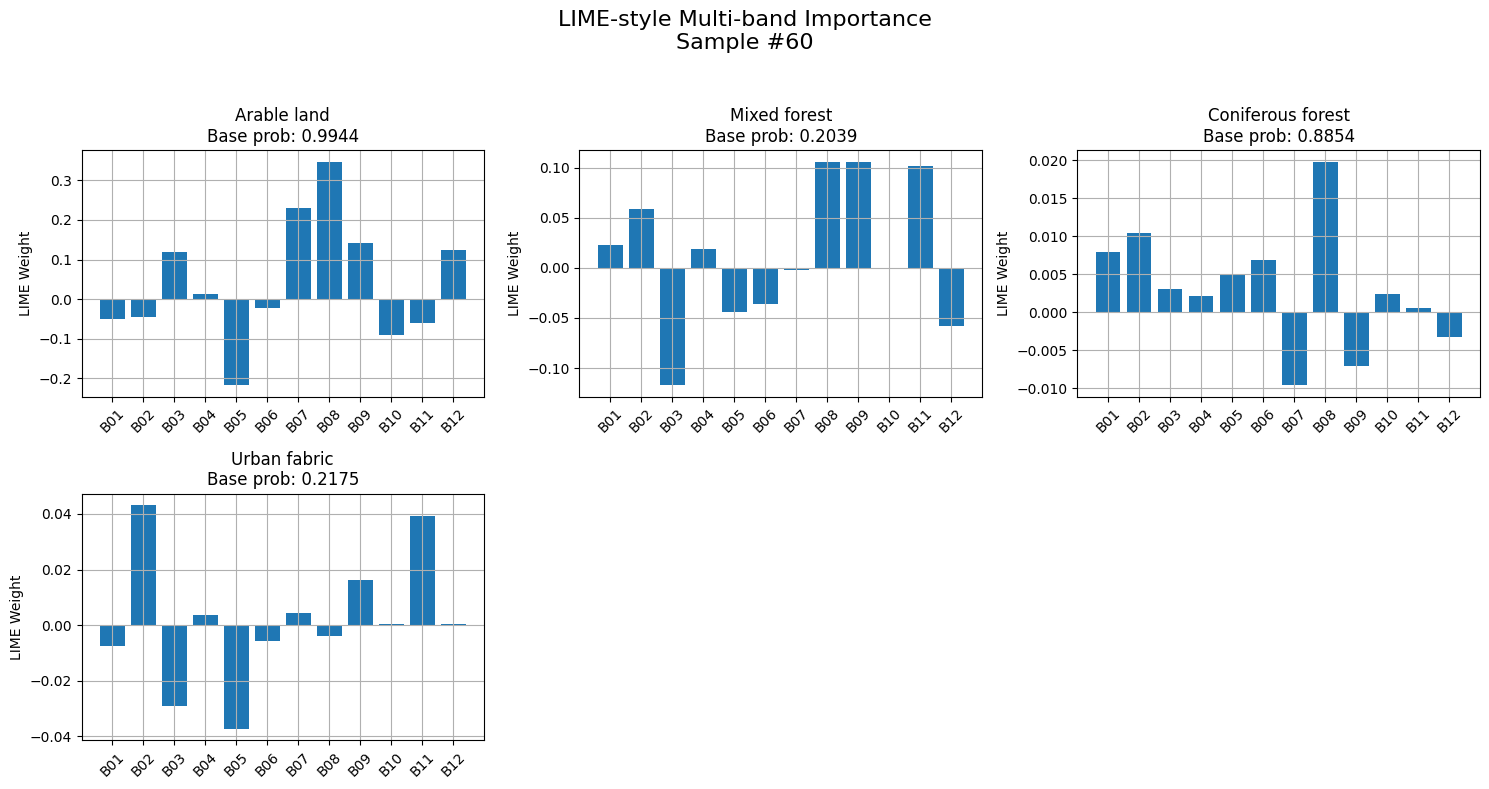

Ground truth labels: ['Arable land', 'Mixed forest', 'Coniferous forest', 'Urban fabric']


In [ ]:
import torch
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

model_path = "/kaggle/input/efficientnet-v3/t-capstone-process-bigearth-nhan-efficientnet-v3.pth"
model = torch.load(model_path, map_location=device, weights_only=False)
def lime_multi_band_importance(model, image, true_label, target_class=None, num_samples=2000, method='zero'):
    model.eval()
    image = image.to(device)

    # N·∫øu kh√¥ng ch·ªâ ƒë·ªãnh class ‚Üí l·∫•y nh√£n ƒë·∫ßu ti√™n trong ground truth
    if target_class is None:
        target_class = torch.where(true_label == 1)[0][0].item()

    # D·ª± ƒëo√°n x√°c su·∫•t g·ªëc
    with torch.no_grad():
        base_prob = torch.sigmoid(model(image.unsqueeze(0)))[0, target_class].item()

    C = image.shape[0]  # s·ªë bands, v√≠ d·ª• 12
    masks = []
    probs = []

    for _ in range(num_samples):
        # Mask vector: 1 gi·ªØ nguy√™n, 0 l√† che
        band_mask = np.random.randint(0, 2, size=C)
        masked_image = image.clone()

        for i in range(C):
            if band_mask[i] == 0:
                if method == 'zero':
                    masked_image[i] = 0
                elif method == 'mean':
                    masked_image[i] = image[i].mean()

        with torch.no_grad():
            prob = torch.sigmoid(model(masked_image.unsqueeze(0)))[0, target_class].item()

        masks.append(band_mask)
        probs.append(prob)

    # Chuy·ªÉn v·ªÅ array
    masks = np.array(masks)  # shape (num_samples, C)
    probs = np.array(probs)  # shape (num_samples,)

    # T√≠nh Y: ch√™nh l·ªách x√°c su·∫•t so v·ªõi g·ªëc (gi·∫£m bao nhi√™u)
    y = probs

    # H·ªìi quy tuy·∫øn t√≠nh (Ridge ƒë·ªÉ ·ªïn ƒë·ªãnh)
    reg = Ridge(alpha=1.0)
    reg.fit(masks, y)
    band_importances = reg.coef_

    return band_importances, target_class, base_prob
def show_lime_multi_band(model, dataset, index, num_samples=2000, method='zero', class_indices=None):
    image, label = dataset[index]

    # N·∫øu kh√¥ng ch·ªâ ƒë·ªãnh, gi·∫£i th√≠ch cho t·∫•t c·∫£ nh√£n ground-truth
    if class_indices is None:
        class_indices = torch.where(label == 1)[0].tolist()

    band_names = [f'B{i+1:02d}' for i in range(image.shape[0])]
    n_classes = len(class_indices)
    n_cols = min(n_classes, 3)
    n_rows = (n_classes + n_cols - 1) // n_cols

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, class_idx in enumerate(class_indices):
        importances, _, base_prob = lime_multi_band_importance(model, image, label, target_class=class_idx,
                                                                num_samples=num_samples, method=method)
        plt.subplot(n_rows, n_cols, i + 1)
        plt.bar(band_names, importances)
        plt.title(f"{class_list[class_idx]}\nBase prob: {base_prob:.4f}")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.ylabel("LIME Weight")

    plt.suptitle(f"LIME-style Multi-band Importance\nSample #{index}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    print("Ground truth labels:", [class_list[i] for i, v in enumerate(label) if v == 1])
show_lime_multi_band(model, test_dataset, index=60)

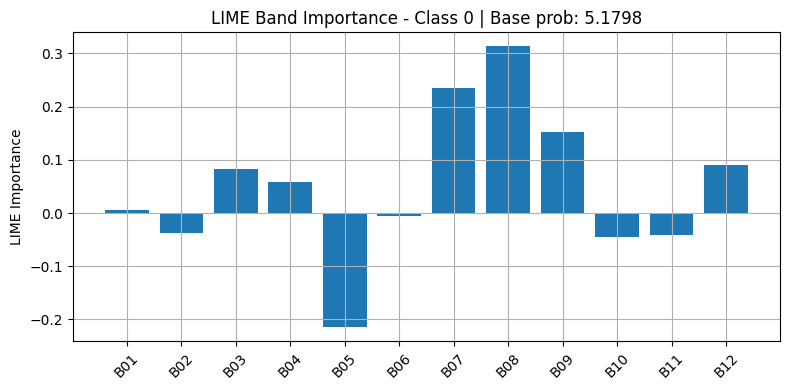

Ground truth labels: [0, 1, 2, 8]


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ======= Load model g·ªëc ========
model_path = "/kaggle/input/efficientnet-v3/t-capstone-process-bigearth-nhan-efficientnet-v3.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()

# ======= Wrapper: ch·ªâ d·ª± ƒëo√°n cho 1 class ========
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        out = self.base_model(x)
        return out[:, self.class_idx].unsqueeze(-1)  # (batch_size, 1)

# ======= LIME-style XAI cho 1 class ========
def lime_multi_band_importance_class_model(class_model, image, num_samples=200, method='zero'):
    class_model.eval()
    image = image.to(device)

    with torch.no_grad():
        base_prob = torch.sigmoid(class_model(image.unsqueeze(0)))[0].item()
        # base_prob = (class_model(image.unsqueeze(0)))[0].item()
    C = image.shape[0]
    masks = []
    probs = []

    for _ in range(num_samples):
        band_mask = np.random.randint(0, 2, size=C)
        masked_image = image.clone()

        for i in range(C):
            if band_mask[i] == 0:
                if method == 'zero':
                    masked_image[i] = 0
                elif method == 'mean':
                    masked_image[i] = image[i].mean()

        with torch.no_grad():
            prob = torch.sigmoid(class_model(masked_image.unsqueeze(0)))[0].item()

        masks.append(band_mask)
        probs.append(prob)

    masks = np.array(masks)
    probs = np.array(probs)

    # y = np.clip(base_prob - probs, 0, None)  # ch·ªâ h·ªçc t·ª´ ph·∫ßn gi·∫£m
    y= probs

    reg = LinearRegression()
    reg.fit(masks, y)
    band_importances = reg.coef_

    return band_importances, base_prob
def show_lime_single_class(base_model, dataset, index, class_idx, num_samples=500, method='zero'):
    image, label = dataset[index]
    band_names = [f'B{i+1:02d}' for i in range(image.shape[0])]

    # T·∫°o model wrapper cho class c·ª• th·ªÉ
    class_model = MultiLabelModel(base_model, class_idx).to(device)

    importances, base_prob = lime_multi_band_importance_class_model(class_model, image,
                                                                     num_samples=num_samples,
                                                                     method=method)

    # V·∫Ω bi·ªÉu ƒë·ªì
    plt.figure(figsize=(8, 4))
    plt.bar(band_names, importances)
    plt.title(f"LIME Band Importance - Class {class_idx} | Base prob: {base_prob:.4f}")
    plt.xticks(rotation=45)
    plt.ylabel("LIME Importance")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("Ground truth labels:", [i for i, v in enumerate(label) if v == 1])
# V√≠ d·ª•: gi·∫£i th√≠ch sample s·ªë 5823 cho class 0
show_lime_single_class(model, test_dataset, index=60, class_idx=0)

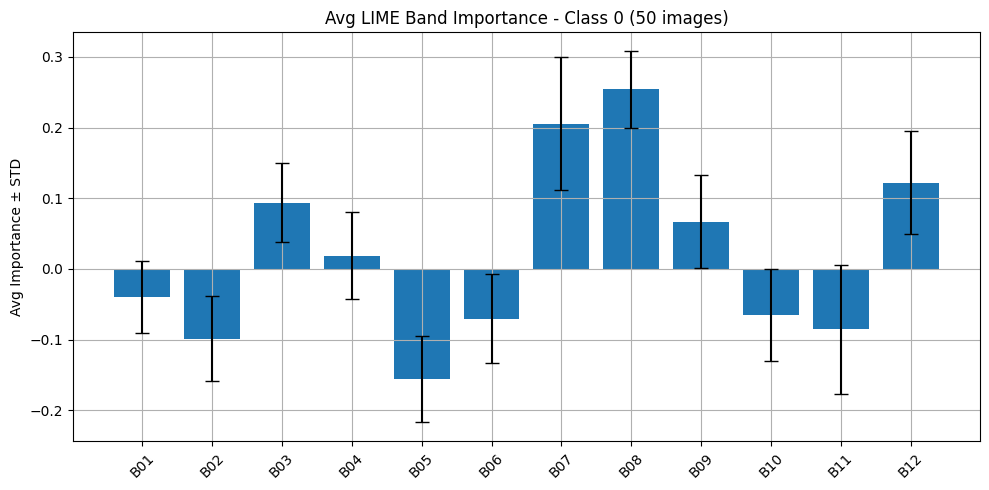

S·ªë ·∫£nh d√πng: 50
Mean base prob: 3.4491


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ======= Load model ========
model_path = "/kaggle/input/efficientnet-v3/t-capstone-process-bigearth-nhan-efficientnet-v3.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()

# ======= Wrapper cho 1 class ========
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        out = self.base_model(x)
        return out[:, self.class_idx].unsqueeze(-1)  # (batch_size, 1)

# ======= LIME cho 1 ·∫£nh, 1 class ========
def lime_multi_band_importance_class_model(class_model, image, num_samples=200, method='zero'):
    class_model.eval()
    image = image.to(device)

    with torch.no_grad():
        base_prob = (class_model(image.unsqueeze(0)))[0].item()

    C = image.shape[0]
    masks = []
    probs = []

    for _ in range(num_samples):
        band_mask = np.random.randint(0, 2, size=C)
        masked_image = image.clone()

        for i in range(C):
            if band_mask[i] == 0:
                if method == 'zero':
                    masked_image[i] = 0
                elif method == 'mean':
                    masked_image[i] = image[i].mean()

        with torch.no_grad():
            prob = torch.sigmoid(class_model(masked_image.unsqueeze(0)))[0].item()

        masks.append(band_mask)
        probs.append(prob)

    masks = np.array(masks)
    probs = np.array(probs)
    y = probs

    reg = LinearRegression()
    reg.fit(masks, y)
    band_importances = reg.coef_

    return band_importances, base_prob

# ======= T·ªïng qu√°t ho√° LIME cho nhi·ªÅu ·∫£nh c√πng class ========
def lime_summary_for_class(base_model, dataset, class_idx, max_images=50, num_samples=200, method='zero'):
    class_model = MultiLabelModel(base_model, class_idx).to(device)
    class_model.eval()

    importances_list = []
    base_probs = []
    count = 0

    for i in range(len(dataset)):
        image, label = dataset[i]

        # Ki·ªÉm tra ·∫£nh c√≥ ch·ª©a class kh√¥ng
        if label[class_idx] != 1:
            continue

        band_importances, base_prob = lime_multi_band_importance_class_model(
            class_model, image, num_samples=num_samples, method=method
        )
        importances_list.append(band_importances)
        base_probs.append(base_prob)

        count += 1
        if count >= max_images:
            break

    if not importances_list:
        print(f"Kh√¥ng t√¨m th·∫•y ·∫£nh n√†o c√≥ class {class_idx}")
        return

    importances_array = np.stack(importances_list, axis=0)
    mean_importance = np.mean(importances_array, axis=0)
    std_importance = np.std(importances_array, axis=0)
    band_names = [f'B{i+1:02d}' for i in range(mean_importance.shape[0])]

    # V·∫Ω bi·ªÉu ƒë·ªì
    plt.figure(figsize=(10, 5))
    plt.bar(band_names, mean_importance, yerr=std_importance, capsize=5)
    plt.title(f"Avg LIME Band Importance - Class {class_idx} ({count} images)")
    plt.xticks(rotation=45)
    plt.ylabel("Avg Importance ¬± STD")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"S·ªë ·∫£nh d√πng: {count}")
    print(f"Mean base prob: {np.mean(base_probs):.4f}")

# ======= Ch·∫°y v√≠ d·ª•: T·ªïng qu√°t ho√° cho class 0 ========
# Nh·ªõ ƒë·ªãnh nghƒ©a `test_dataset` tr∆∞·ªõc khi g·ªçi
# test_dataset = ... (n√™n l√† d·∫°ng torch Dataset, g·ªìm (image, label))

lime_summary_for_class(model, test_dataset, class_idx=0, max_images=50, num_samples=200)


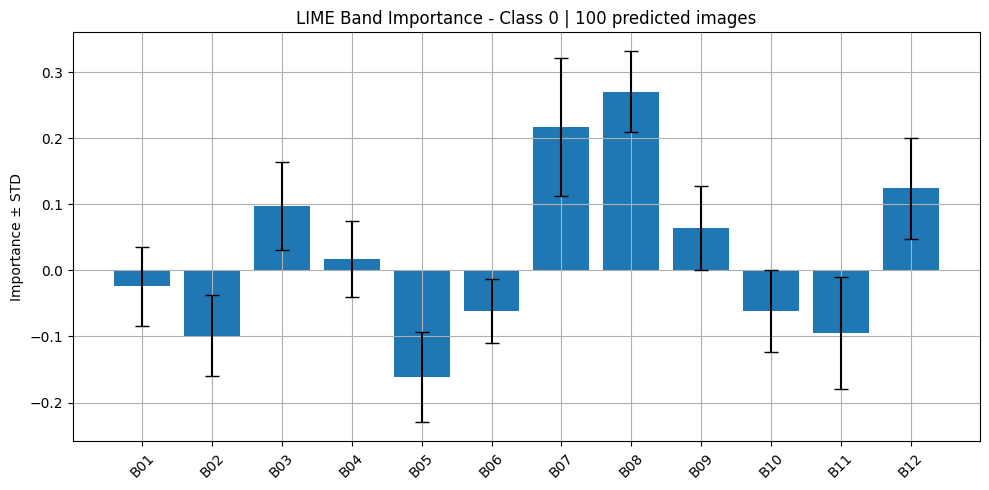

S·ªë ·∫£nh d·ª± ƒëo√°n class 0: 100
Mean base prob: 0.9114


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ======= Load model ========
model_path = "/kaggle/input/efficientnet-v3/t-capstone-process-bigearth-nhan-efficientnet-v3.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()

# ======= Wrapper cho 1 class ========
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        out = self.base_model(x)
        return out[:, self.class_idx].unsqueeze(-1)  # (batch_size, 1)

# ======= LIME cho 1 ·∫£nh, 1 class ========
def lime_multi_band_importance_class_model(class_model, image, num_samples=200, method='zero'):
    class_model.eval()
    image = image.to(device)

    with torch.no_grad():
        base_prob = torch.sigmoid(class_model(image.unsqueeze(0)))[0].item()

    C = image.shape[0]
    masks = []
    probs = []

    for _ in range(num_samples):
        band_mask = np.random.randint(0, 2, size=C)
        masked_image = image.clone()

        for i in range(C):
            if band_mask[i] == 0:
                if method == 'zero':
                    masked_image[i] = 0
                elif method == 'mean':
                    masked_image[i] = image[i].mean()

        with torch.no_grad():
            prob = torch.sigmoid(class_model(masked_image.unsqueeze(0)))[0].item()

        masks.append(band_mask)
        probs.append(prob)

    masks = np.array(masks)
    probs = np.array(probs)
    y = probs

    reg = LinearRegression()
    reg.fit(masks, y)
    band_importances = reg.coef_

    return band_importances, base_prob

# ======= T·ªïng qu√°t ho√° LIME cho nhi·ªÅu ·∫£nh ƒë∆∞·ª£c model d·ª± ƒëo√°n c√≥ class ========
def lime_summary_for_predicted_class(base_model, dataset, class_idx, max_images=100, num_samples=200, method='zero'):
    class_model = MultiLabelModel(base_model, class_idx).to(device)
    class_model.eval()

    importances_list = []
    base_probs = []
    count = 0

    for i in range(len(dataset)):
        image, label = dataset[i]
        image = image.to(device).unsqueeze(0)

        with torch.no_grad():
            output = torch.sigmoid(base_model(image))[0]
            pred_prob = output[class_idx].item()

        if pred_prob <= 0.5:
            continue  # Ch·ªâ l·∫•y ·∫£nh model d·ª± ƒëo√°n class_idx > 0.5

        band_importances, base_prob = lime_multi_band_importance_class_model(
            class_model, image.squeeze(0), num_samples=num_samples, method=method
        )
        importances_list.append(band_importances)
        base_probs.append(base_prob)

        count += 1
        if count >= max_images:
            break

    if not importances_list:
        print(f"Kh√¥ng t√¨m th·∫•y ·∫£nh n√†o m√† m√¥ h√¨nh d·ª± ƒëo√°n class {class_idx}")
        return

    importances_array = np.stack(importances_list, axis=0)
    mean_importance = np.mean(importances_array, axis=0)
    std_importance = np.std(importances_array, axis=0)
    band_names = [f'B{i+1:02d}' for i in range(mean_importance.shape[0])]

    # V·∫Ω bi·ªÉu ƒë·ªì
    plt.figure(figsize=(10, 5))
    plt.bar(band_names, mean_importance, yerr=std_importance, capsize=5)
    plt.title(f"LIME Band Importance - Class {class_idx} | {count} predicted images")
    plt.xticks(rotation=45)
    plt.ylabel("Importance ¬± STD")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"S·ªë ·∫£nh d·ª± ƒëo√°n class {class_idx}: {count}")
    print(f"Mean base prob: {np.mean(base_probs):.4f}")

# ======= G·ªçi h√†m cho class 0 ========
lime_summary_for_predicted_class(
    base_model=model,
    dataset=test_dataset,
    class_idx=0,
    max_images=100,
    num_samples=200,
    method='zero'
)

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ======= Load model ========
model_path = "/kaggle/input/efficientnet-v3/t-capstone-process-bigearth-nhan-efficientnet-v3.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()

# ======= Wrapper cho 1 class ========
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        out = self.base_model(x)
        return out[:, self.class_idx].unsqueeze(-1)  # (batch_size, 1)

# ======= LIME cho 1 ·∫£nh, 1 class ========
def lime_multi_band_importance_class_model(class_model, image, num_samples=500, method='zero'):
    class_model.eval()
    image = image.to(device)

    with torch.no_grad():
        base_prob = torch.sigmoid(class_model(image.unsqueeze(0)))[0].item()

    C = image.shape[0]
    masks = []
    probs = []

    for _ in range(num_samples):
        band_mask = np.random.randint(0, 2, size=C)
        masked_image = image.clone()

        for i in range(C):
            if band_mask[i] == 0:
                if method == 'zero':
                    masked_image[i] = 0
                elif method == 'mean':
                    masked_image[i] = image[i].mean()

        with torch.no_grad():
            prob = torch.sigmoid(class_model(masked_image.unsqueeze(0)))[0].item()

        masks.append(band_mask)
        probs.append(prob)

    masks = np.array(masks)
    probs = np.array(probs)
    y = probs

    reg = LinearRegression()
    reg.fit(masks, y)
    band_importances = reg.coef_

    return band_importances, base_prob

# ======= T·ªïng qu√°t ho√° LIME cho nhi·ªÅu ·∫£nh ƒë∆∞·ª£c model d·ª± ƒëo√°n c√≥ class ========
def lime_summary_for_predicted_class(base_model, dataset, class_idx, max_images=1000, num_samples=500, method='zero'):
    class_model = MultiLabelModel(base_model, class_idx).to(device)
    class_model.eval()

    importances_list = []
    base_probs = []
    count = 0

    for i in range(len(dataset)):
        image, label = dataset[i]
        image = image.to(device).unsqueeze(0)

        with torch.no_grad():
            output = torch.sigmoid(base_model(image))[0]
            pred_prob = output[class_idx].item()

        if pred_prob <= 0.5:
            continue  # Ch·ªâ l·∫•y ·∫£nh model d·ª± ƒëo√°n class_idx > 0.5

        band_importances, base_prob = lime_multi_band_importance_class_model(
            class_model, image.squeeze(0), num_samples=num_samples, method=method
        )
        importances_list.append(band_importances)
        base_probs.append(base_prob)

        count += 1
        if count >= max_images:
            break

    if not importances_list:
        print(f"Kh√¥ng t√¨m th·∫•y ·∫£nh n√†o m√† m√¥ h√¨nh d·ª± ƒëo√°n class {class_idx}")
        return

    importances_array = np.stack(importances_list, axis=0)
    mean_importance = np.mean(importances_array, axis=0)
    std_importance = np.std(importances_array, axis=0)
    band_names = [f'B{i+1:02d}' for i in range(mean_importance.shape[0])]

    # V·∫Ω bi·ªÉu ƒë·ªì
    plt.figure(figsize=(10, 5))
    plt.bar(band_names, mean_importance, yerr=std_importance, capsize=5)
    plt.title(f"LIME Band Importance - Class {class_idx} | {count} predicted images")
    plt.xticks(rotation=45)
    plt.ylabel("Importance ¬± STD")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"S·ªë ·∫£nh d·ª± ƒëo√°n class {class_idx}: {count}")
    print(f"Mean base prob: {np.mean(base_probs):.4f}")

# ======= G·ªçi h√†m cho class 13 ========
lime_summary_for_predicted_class(
    base_model=model,
    dataset=test_dataset,
    # ƒê·ªïi class_idx theo index c·ªßa list nh√£n
    class_idx=17,
    max_images=1000,
    num_samples=500,
    method='zero'
)

In [ ]:
import torch
import numpy as np
from sklearn.metrics import (
    classification_report, precision_recall_fscore_support, average_precision_score
)
from sklearn.metrics import (
    classification_report, multilabel_confusion_matrix, roc_auc_score,
    precision_recall_fscore_support, average_precision_score,
    hamming_loss, accuracy_score, precision_score, recall_score,
    f1_score, jaccard_score, roc_curve, precision_recall_curve, auc
)

# Gi·∫£ s·ª≠ test_loader v√† model ƒë√£ c√≥ s·∫µn
# Class 0 l√† "Arable land", t∆∞∆°ng ·ª©ng index = 0
# class_list l√† danh s√°ch t√™n l·ªõp theo th·ª© t·ª±

def evaluate_model_mask_band8(model, dataloader, device, threshold=0.5):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in dataloader:
            # Mask to√†n b·ªô band 8 (index 7 v√¨ b·∫Øt ƒë·∫ßu t·ª´ 0)
            images[:, 6, :, :] = 0.0

            images = images.to(device)
            labels = labels.to(device)
            outputs = torch.sigmoid(model(images))

            all_preds.append(outputs.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    y_true = np.vstack(all_labels)
    y_scores = np.vstack(all_preds)
    y_pred = (y_scores >= threshold).astype(int)

    return y_true, y_scores, y_pred

# === Ch·∫°y ƒë√°nh gi√° ===
y_true, y_scores, y_pred = evaluate_model_mask_band8(model, test_loader, device)

# === ƒê√°nh gi√° ri√™ng class 0 (Arable land) ===
class_idx = 17  # class "Arable land"

# Precision, Recall, F1 cho class 0
precision_0 = precision_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
recall_0 = recall_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
f1_0 = f1_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
support_0 = int(np.sum(y_true[:, class_idx]))

# === In k·∫øt qu·∫£ ===
print(f"\nClass 17 - {class_list[class_idx]}")
print(f"Precision: {precision_0:.2f}")
print(f"Recall:    {recall_0:.2f}")
print(f"F1-Score:  {f1_0:.2f}")
print(f"Support:   {support_0}")


Class 18 - Beaches, dunes, sands
Precision: 0.03
Recall:    0.45
F1-Score:  0.06
Support:   60


In [ ]:
import torch
import numpy as np
from lime import lime_image
from scipy.stats import spearmanr
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

# Thi·∫øt b·ªã
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.eval()

# === T√¨m ·∫£nh ƒë·∫ßu ti√™n c√≥ ch·ª©a class 0 ===
target_class = 0
target_image = None
target_label = None

for i in range(len(test_dataset)):
    image, label = test_dataset[i]
    if label[target_class] == 1:
        target_image = image
        target_label = label
        break

if target_image is None:
    raise ValueError("Kh√¥ng t√¨m th·∫•y ·∫£nh n√†o ch·ª©a class 0 trong t·∫≠p test.")

# Chu·∫©n h√≥a l·∫°i ·∫£nh: CHW ‚Üí HWC cho LIME
image_np = target_image.numpy().transpose(1, 2, 0)
label_np = target_label.numpy()

# Th√™m batch dimension cho tensor
image_tensor = target_image.unsqueeze(0).to(device)

# === LIME Explainer ===
explainer = lime_image.LimeImageExplainer()

# H√†m d·ª± ƒëo√°n cho LIME
def batch_predict(images_np):
    images_tensor = torch.tensor(images_np.transpose(0, 3, 1, 2)).float().to(device)
    outputs = model(images_tensor)
    return outputs.detach().cpu().numpy()

# === Gi·∫£i th√≠ch b·∫±ng LIME ===
explanation = explainer.explain_instance(
    image_np,
    classifier_fn=batch_predict,
    top_labels=10,
    hide_color=0,
    num_samples=1000
)

# === T√≠nh importance cho t·ª´ng class ===
lime_class_importance = {}
for class_id in explanation.top_labels:
    _, mask = explanation.get_image_and_mask(
        class_id,
        positive_only=True,
        num_features=5,
        hide_rest=False
    )
    importance = np.sum(mask)
    lime_class_importance[class_id] = importance

# === Vector h√≥a importance (d·∫°ng 19 chi·ªÅu) ===
n_classes = len(label_np)  # V√≠ d·ª•: 19
lime_importance_vector = np.zeros(n_classes)
for class_id, score in lime_class_importance.items():
    lime_importance_vector[class_id] = score

# === Vector nh√£n ground truth: class n√†o c√≥ th√¨ score = 1 ===
label_importance_vector = label_np.astype(float)

# === T√≠nh Spearman rank correlation ===
spearman_corr, _ = spearmanr(lime_importance_vector, label_importance_vector)

print(f"‚úÖ Spearman rank correlation = {spearman_corr:.4f}")

from skimage.segmentation import mark_boundaries

class_id_to_show = 0  # v√≠ d·ª•: class 0

img_boundry, mask = explanation.get_image_and_mask(
    class_id=class_id_to_show,
    positive_only=True,
    num_features=5,
    hide_rest=False
)

plt.imshow(mark_boundaries(img_boundry, mask))
plt.title(f"LIME Explanation - Class {class_id_to_show}")
plt.axis("off")
plt.show()

ValueError: Only RGB images can be converted to Lab space.

**Ch·ªâ ch·∫°y ph·∫ßn tr√™n**

In [ ]:
!pip install shap

In [ ]:
!pip install timm==1.0.17 --upgrade

In [ ]:
import torch
import torch.nn as nn
import timm  # n·∫øu b·∫°n d√πng m√¥ h√¨nh t·ª´ timm

class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        # Load ViT Hybrid pretrained
        model = timm.create_model("vit_base_r50_s16_224", pretrained=True)

        # S·ª≠a Conv2d ƒë·∫ßu ti√™n c·ªßa ResNet50 backbone ƒë·ªÉ nh·∫≠n 12 bands
        old_conv = model.patch_embed.backbone.stem[0]
        new_conv = nn.Conv2d(
            in_channels=12,
            out_channels=old_conv.out_channels,
            kernel_size=old_conv.kernel_size,
            stride=old_conv.stride,
            padding=old_conv.padding,
            bias=False
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
from torch.serialization import add_safe_globals
from timm.models.vision_transformer import VisionTransformer

# B∆∞·ªõc 1: Cho ph√©p VisionTransformer ƒë∆∞·ª£c load (n·∫øu file ch·ª©a m√¥ h√¨nh n√†y)
add_safe_globals({'VisionTransformer': VisionTransformer})

# B∆∞·ªõc 2: Load to√†n b·ªô m√¥ h√¨nh
model_path = "/kaggle/input/vit-for-bigearthnet-new/my_pytorch_model_bigearth_1.pth"
model = torch.load(model_path, map_location='cpu', weights_only=False)
model.eval()
print("‚úÖ M√¥ h√¨nh ViT Hybrid ƒë√£ kh·ªüi t·∫°o v√† load tr·ªçng s·ªë.")

‚úÖ M√¥ h√¨nh ViT Hybrid ƒë√£ kh·ªüi t·∫°o v√† load tr·ªçng s·ªë.


Using device: cpu
Model loaded and moved to cpu
True Labels (binary vector):
 [1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [0.94679 0.41246 0.85918 0.00562 0.00694 0.69705 0.7874  0.71571 0.70766
 0.05109 0.00056 0.00036 0.00146 0.01812 0.00109 0.00018 0.01077 0.00034
 0.00062]
Sigmoid(Logits):
 [0.72047 0.60168 0.70249 0.5014  0.50174 0.66753 0.68727 0.67166 0.66988
 0.51277 0.50014 0.50009 0.50036 0.50453 0.50027 0.50004 0.50269 0.50009
 0.50016]
Predicted Labels:
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


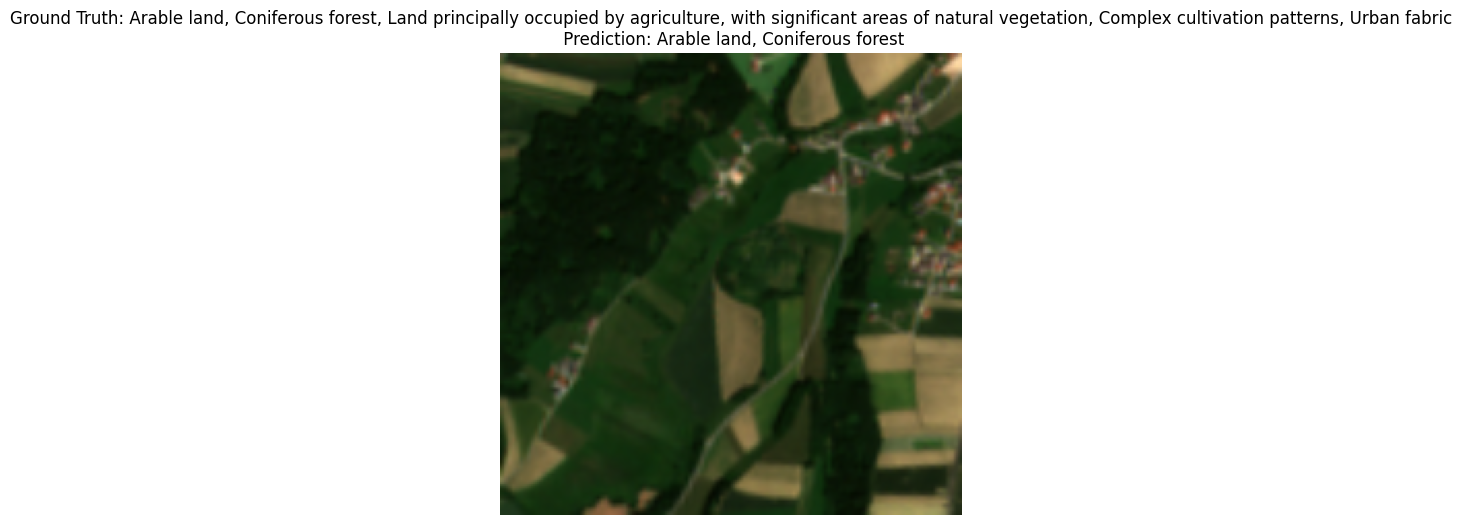

True Labels (binary vector):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Logits:
 [0.00429 0.00191 0.01268 0.02809 0.00171 0.00283 0.00397 0.00539 0.00232
 0.00118 0.00852 0.0007  0.0028  0.96192 0.3889  0.26412 0.00122 0.00064
 0.00141]
Sigmoid(Logits):
 [0.50107 0.50048 0.50317 0.50702 0.50043 0.50071 0.50099 0.50135 0.50058
 0.50029 0.50213 0.50018 0.5007  0.72351 0.59602 0.56565 0.5003  0.50016
 0.50035]
Predicted Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


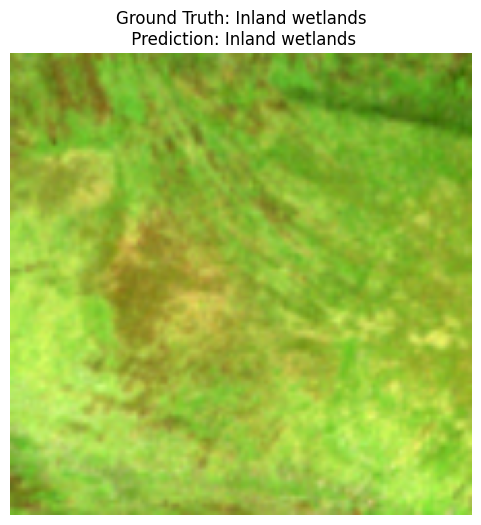

True Labels (binary vector):
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [0.01036 0.99349 0.85999 0.35477 0.01174 0.10419 0.00062 0.00038 0.01738
 0.0288  0.96222 0.00013 0.00019 0.0034  0.00016 0.00007 0.00269 0.00173
 0.00013]
Sigmoid(Logits):
 [0.50259 0.72978 0.70266 0.58777 0.50294 0.52602 0.50015 0.50009 0.50435
 0.5072  0.72357 0.50003 0.50005 0.50085 0.50004 0.50002 0.50067 0.50043
 0.50003]
Predicted Labels:
 [0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


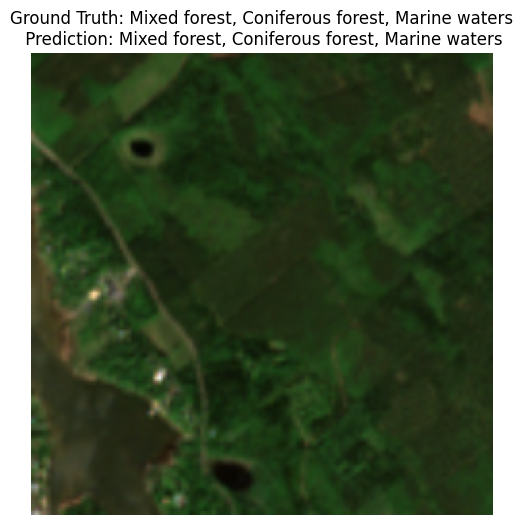

True Labels (binary vector):
 [0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [0.27758 0.08385 0.01741 0.48459 0.88306 0.09387 0.09168 0.20012 0.007
 0.00677 0.00018 0.84295 0.13027 0.00028 0.0188  0.01345 0.00233 0.0002
 0.00006]
Sigmoid(Logits):
 [0.56895 0.52095 0.50435 0.61883 0.70746 0.52345 0.5229  0.54986 0.50175
 0.50169 0.50005 0.69909 0.53252 0.50007 0.5047  0.50336 0.50058 0.50005
 0.50002]
Predicted Labels:
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


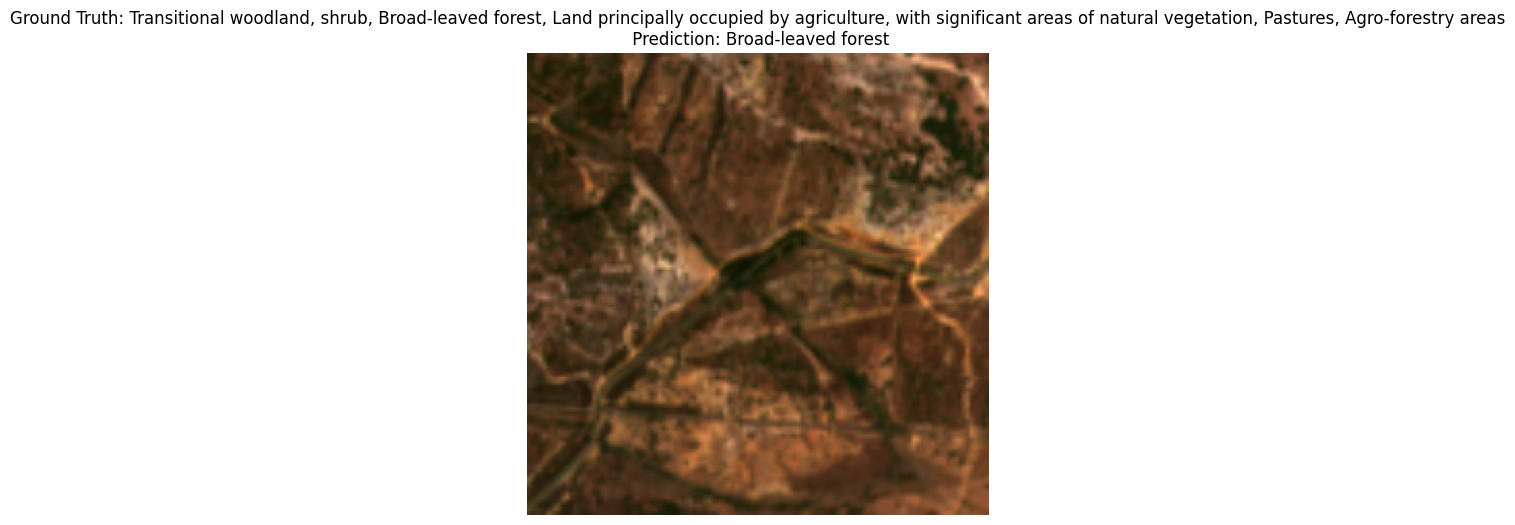

True Labels (binary vector):
 [1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [0.99818 0.26336 0.4605  0.00686 0.00434 0.88323 0.51089 0.21673 0.8001
 0.00196 0.00007 0.00049 0.00157 0.00244 0.00057 0.00011 0.00401 0.00006
 0.00016]
Sigmoid(Logits):
 [0.7307  0.56546 0.61313 0.50172 0.50108 0.70749 0.62501 0.55397 0.69
 0.50049 0.50002 0.50012 0.50039 0.50061 0.50014 0.50003 0.501   0.50002
 0.50004]
Predicted Labels:
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


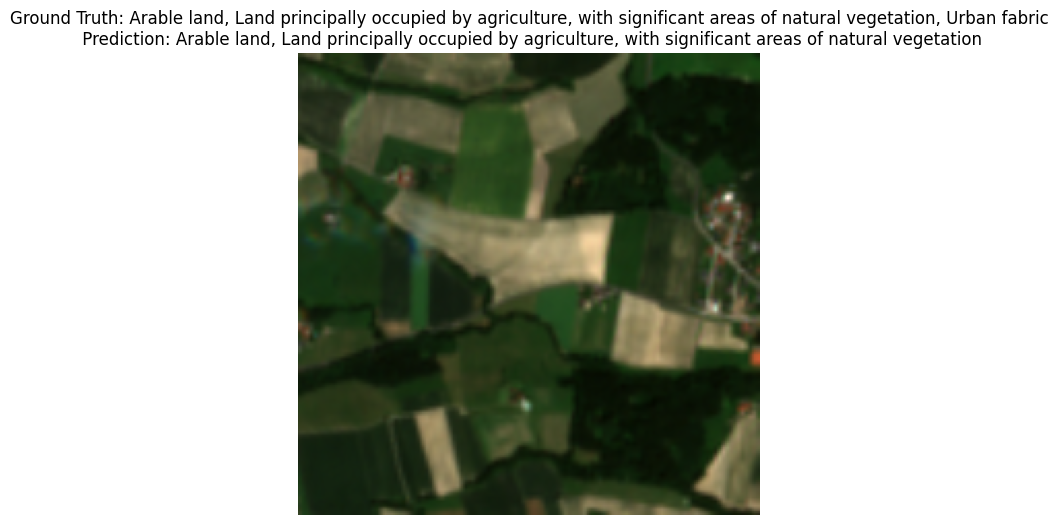

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import random
from torch.serialization import add_safe_globals
from timm.models.vision_transformer import VisionTransformer

# Lu√¥n d√πng CPU
device = torch.device("cpu")
print("Using device:", device)

# Load model EfficientNet ƒë√£ hu·∫•n luy·ªán (tr√™n CPU)
# B∆∞·ªõc 1: Cho ph√©p VisionTransformer ƒë∆∞·ª£c load (n·∫øu file ch·ª©a m√¥ h√¨nh n√†y)
add_safe_globals({'VisionTransformer': VisionTransformer})

# B∆∞·ªõc 2: Load to√†n b·ªô m√¥ h√¨nh
model_path = "/kaggle/input/vit-for-bigearthnet-new/my_pytorch_model_bigearth_1.pth"
model = torch.load(model_path, map_location='cpu', weights_only=False)
model.eval()
print("Model loaded and moved to", device)

# Danh s√°ch class BigEarthNet
class_list = [
    'Arable land',
    'Mixed forest',
    'Coniferous forest',
    'Transitional woodland, shrub',
    'Broad-leaved forest',
    'Land principally occupied by agriculture, with significant areas of natural vegetation',
    'Complex cultivation patterns',
    'Pastures',
    'Urban fabric',
    'Inland waters',
    'Marine waters',
    'Agro-forestry areas',
    'Permanent crops',
    'Inland wetlands',
    'Moors, heathland and sclerophyllous vegetation',
    'Natural grassland and sparsely vegetated areas',
    'Industrial or commercial units',
    'Coastal wetlands',
    'Beaches, dunes, sands'
]

# H√†m hi·ªÉn th·ªã prediction
def show_sample_prediction(dataset, index):
    image, true_labels = dataset[index]
    input_tensor = image.unsqueeze(0).to(device)  # (1, C, H, W)

    np.set_printoptions(suppress=True, precision=5)
    # D·ª± ƒëo√°n
    with torch.no_grad():
        output = model(input_tensor)
        sigmoid_probs = torch.sigmoid(output.squeeze()).cpu().numpy()
        predicted = (sigmoid_probs > 0.7).astype(int)  # S·ª≠a ch·ªó n√†y

    # Hi·ªÉn th·ªã ma tr·∫≠n nh√£n g·ªëc v√† predicted
    print("True Labels (binary vector):\n", true_labels.numpy())
    print("Logits:\n", output.squeeze().cpu().numpy())
    print("Sigmoid(Logits):\n", np.array2string(sigmoid_probs, precision=5, suppress_small=True))
    print("Predicted Labels:\n", predicted)

    # L·∫•y t√™n nh√£n
    true_label_names = [class_list[i] for i, val in enumerate(true_labels) if val == 1]
    predicted_label_names = [class_list[i] for i, val in enumerate(predicted) if val == 1]

    # Hi·ªÉn th·ªã ·∫£nh (ch·ªçn RGB bands 4,3,2)
    img_np = image.cpu().numpy().transpose(1, 2, 0)
    rgb = img_np[:, :, [3, 2, 1]]  # Bands 4,3,2
    rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)  # Scale v·ªÅ [0,1]

    plt.figure(figsize=(6, 6))
    plt.imshow(rgb)
    plt.axis('off')
    plt.title("Ground Truth: {}\n Prediction: {}".format(", ".join(true_label_names), ", ".join(predicted_label_names)))
    plt.show()

# Hi·ªÉn th·ªã 5 m·∫´u random t·ª´ test_dataset
for _ in range(5):
    idx = random.randint(0, len(test_dataset) - 1)
    show_sample_prediction(test_dataset, idx)

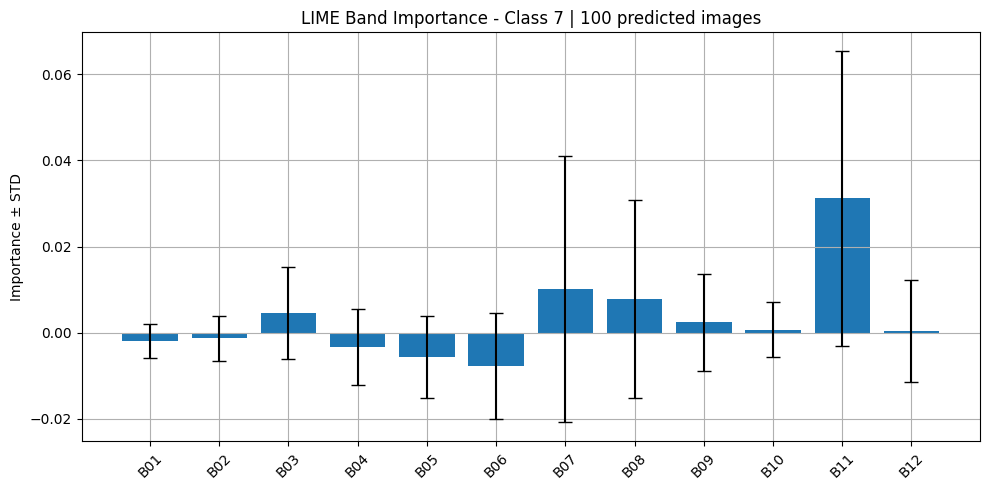

S·ªë ·∫£nh d·ª± ƒëo√°n class 7: 100
Mean base prob: 0.5509


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import timm
from sklearn.linear_model import LinearRegression

# ======= Load model ========
model_path = "/kaggle/input/vit-for-bigearthnet-new/my_pytorch_model_bigearth_1.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()

# ======= Wrapper cho 1 class ========
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        out = self.base_model(x)
        return out[:, self.class_idx].unsqueeze(-1)  # (batch_size, 1)

# ======= LIME cho 1 ·∫£nh, 1 class ========
def lime_multi_band_importance_class_model(class_model, image, num_samples=500, method='zero'):
    class_model.eval()
    image = image.to(device)

    with torch.no_grad():
        base_prob = torch.sigmoid(class_model(image.unsqueeze(0)))[0].item()

    C = image.shape[0]
    masks = []
    probs = []

    for _ in range(num_samples):
        band_mask = np.random.randint(0, 2, size=C)
        masked_image = image.clone()

        for i in range(C):
            if band_mask[i] == 0:
                if method == 'zero':
                    masked_image[i] = 0
                elif method == 'mean':
                    masked_image[i] = image[i].mean()

        with torch.no_grad():
            prob = torch.sigmoid(class_model(masked_image.unsqueeze(0)))[0].item()

        masks.append(band_mask)
        probs.append(prob)

    masks = np.array(masks)
    probs = np.array(probs)
    y = probs

    reg = LinearRegression()
    reg.fit(masks, y)
    band_importances = reg.coef_

    return band_importances, base_prob

# ======= T·ªïng qu√°t ho√° LIME cho nhi·ªÅu ·∫£nh ƒë∆∞·ª£c model d·ª± ƒëo√°n c√≥ class ========
def lime_summary_for_predicted_class(base_model, dataset, class_idx, max_images, num_samples, method='zero'):
    class_model = MultiLabelModel(base_model, class_idx).to(device)
    class_model.eval()

    importances_list = []
    base_probs = []
    count = 0

    for i in range(len(dataset)):
        image, label = dataset[i]
        image = image.to(device).unsqueeze(0)

        with torch.no_grad():
            output = torch.sigmoid(base_model(image))[0]
            pred_prob = output[class_idx].item()

        if pred_prob <= 0.5:
            continue  # Ch·ªâ l·∫•y ·∫£nh model d·ª± ƒëo√°n class_idx > 0.5

        band_importances, base_prob = lime_multi_band_importance_class_model(
            class_model, image.squeeze(0), num_samples=num_samples, method=method
        )
        importances_list.append(band_importances)
        base_probs.append(base_prob)

        count += 1
        if count >= max_images:
            break

    if not importances_list:
        print(f"Kh√¥ng t√¨m th·∫•y ·∫£nh n√†o m√† m√¥ h√¨nh d·ª± ƒëo√°n class {class_idx}")
        return

    importances_array = np.stack(importances_list, axis=0)
    mean_importance = np.mean(importances_array, axis=0)
    std_importance = np.std(importances_array, axis=0)
    band_names = [f'B{i+1:02d}' for i in range(mean_importance.shape[0])]

    # V·∫Ω bi·ªÉu ƒë·ªì
    plt.figure(figsize=(10, 5))
    plt.bar(band_names, mean_importance, yerr=std_importance, capsize=5)
    plt.title(f"LIME Band Importance - Class {class_idx} | {count} predicted images")
    plt.xticks(rotation=45)
    plt.ylabel("Importance ¬± STD")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"S·ªë ·∫£nh d·ª± ƒëo√°n class {class_idx}: {count}")
    print(f"Mean base prob: {np.mean(base_probs):.4f}")

# ======= G·ªçi h√†m cho class i ========
lime_summary_for_predicted_class(
    base_model=model,
    dataset=test_dataset,
    # ƒê·ªïi class_idx theo index c·ªßa list nh√£n
    class_idx=7,
    max_images=300,
    num_samples=300,
    method='zero'
)

In [ ]:
import torch
import numpy as np
from sklearn.metrics import (
    classification_report, precision_recall_fscore_support, average_precision_score
)
from sklearn.metrics import (
    classification_report, multilabel_confusion_matrix, roc_auc_score,
    precision_recall_fscore_support, average_precision_score,
    hamming_loss, accuracy_score, precision_score, recall_score,
    f1_score, jaccard_score, roc_curve, precision_recall_curve, auc
)

# Gi·∫£ s·ª≠ test_loader v√† model ƒë√£ c√≥ s·∫µn
# Class 0 l√† "Arable land", t∆∞∆°ng ·ª©ng index = 0
# class_list l√† danh s√°ch t√™n l·ªõp theo th·ª© t·ª±

def evaluate_model_mask_band8(model, dataloader, device, threshold=0.5):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in dataloader:
            # Mask to√†n b·ªô band 8 (index 7 v√¨ b·∫Øt ƒë·∫ßu t·ª´ 0)
            images[:, 5, :, :] = 0.0

            images = images.to(device)
            labels = labels.to(device)
            outputs = torch.sigmoid(model(images))

            all_preds.append(outputs.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    y_true = np.vstack(all_labels)
    y_scores = np.vstack(all_preds)
    y_pred = (y_scores >= threshold).astype(int)

    return y_true, y_scores, y_pred

# === Ch·∫°y ƒë√°nh gi√° ===
y_true, y_scores, y_pred = evaluate_model_mask_band8(model, test_loader, device)

# === ƒê√°nh gi√° ri√™ng class 0 (Arable land) ===
class_idx = 7  # class "Arable land"

# Precision, Recall, F1 cho class 0
precision_0 = precision_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
recall_0 = recall_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
f1_0 = f1_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
support_0 = int(np.sum(y_true[:, class_idx]))

# === In k·∫øt qu·∫£ ===
print(f"\nClass 7 - {class_list[class_idx]}")
print(f"Precision: {precision_0:.2f}")
print(f"Recall:    {recall_0:.2f}")
print(f"F1-Score:  {f1_0:.2f}")
print(f"Support:   {support_0}")


Class 7 - Pastures
Precision: 0.20
Recall:    1.00
F1-Score:  0.34
Support:   3102


In [ ]:
# ‚úÖ Import th∆∞ vi·ªán
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm

# # Lu√¥n d√πng CPU
# device = torch.device("cpu")
# print("Using device:", device)

# # Load model ViT ƒë√£ hu·∫•n luy·ªán (tr√™n CPU)
# model_path = "/content/drive/MyDrive/Document for Capstone/Model/Vit_Bigearthnet_mAP.pth"
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 0  # Thay class b·∫°n mu·ªën xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = self.base_model(x)
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs, _ = next(iter(test_loader))
# background_imgs = background_imgs[:8].to(device)
background_imgs = background_imgs[:5].to(device)  # ch·ªâ l·∫•y 5 ·∫£nh background

test_imgs, _ = next(iter(test_loader))
# test_imgs = test_imgs[:8].to(device)
test_imgs = test_imgs[0:1].to(device)  # ch·ªâ l·∫•y 1 ·∫£nh ƒë·ªÉ explain

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# T√≠nh SHAP values
print(f"üîé Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)

üîé Calculating SHAP for class 0 ...


True labels:     [1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted probs: [0.994 0.204 0.885 0.012 0.004 0.589 0.519 0.271 0.217 0.013 0.    0.
 0.001 0.002 0.    0.    0.005 0.    0.   ]
Predicted labels: [1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
Class 0 probability: 0.9944
True Labels (binary vector):
 [1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [  5.17977  -1.36192   2.04459  -4.425    -5.64743   0.35829   0.07621
  -0.98773  -1.28039  -4.36783 -10.59946 -11.61357  -7.25338  -6.42229
  -8.4077  -10.89799  -5.28563 -17.43534 -11.51279]
Sigmoid(Logits):
 [0.9944  0.20393 0.8854  0.01183 0.00351 0.58863 0.51904 0.27136 0.21748
 0.01252 0.00002 0.00001 0.00071 0.00162 0.00022 0.00002 0.00504 0.
 0.00001]
Predicted Labels:
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


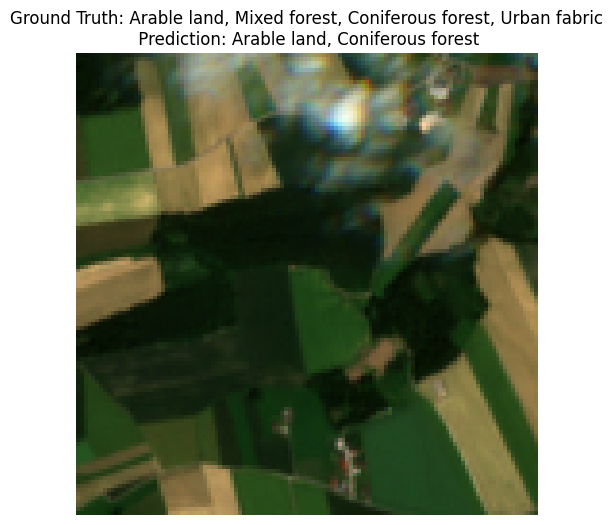

Calculating SHAP for class 0 ...


In [ ]:
# Import th∆∞ vi·ªán
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm

# # Lu√¥n d√πng CPU
device = torch.device("cpu")
model.to(device)
# print("‚ö° Using device:", device)

# # Load model ViT ƒë√£ hu·∫•n luy·ªán (tr√™n CPU)
# model_path = "/content/drive/MyDrive/Document for Capstone/Model/Vit_Bigearthnet_mAP.pth"
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 0  # Thay class b·∫°n mu·ªën xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = self.base_model(x)
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs, _ = next(iter(test_loader))
background_imgs = background_imgs[:5].to(device)  # ch·ªâ l·∫•y 5 ·∫£nh background

# test_imgs, test_labels = next(iter(test_loader))
# test_imgs = test_imgs[1:2].to(device)  # ch·ªâ l·∫•y 1 ·∫£nh ƒë·ªÉ explain
# test_labels = test_labels[0]            # shape (19,)
test_imgs, test_labels = test_dataset[60]
test_imgs = test_imgs.unsqueeze(0).to(device)  # th√™m batch dim

# D·ª± ƒëo√°n cho ·∫£nh ƒë∆∞·ª£c ch·ªçn
with torch.no_grad():
    logits = model(test_imgs)
    probs = torch.sigmoid(logits).cpu().squeeze()  # shape (19,)
    preds = (probs > 0.5).int()  # threshold 0.5


# Hi·ªÉn th·ªã true label v√† predicted label
print("True labels:    ", test_labels.numpy())
print("Predicted probs:", np.round(probs.numpy(), 3))
print("Predicted labels:", preds.numpy())
print(f"Class {class_idx} probability: {probs[class_idx]:.4f}")

show_sample_prediction(test_loader.dataset, 60)

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# T√≠nh SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)

shap_array shape: (12, 120, 120)
mean_shap_per_band shape: (12,)


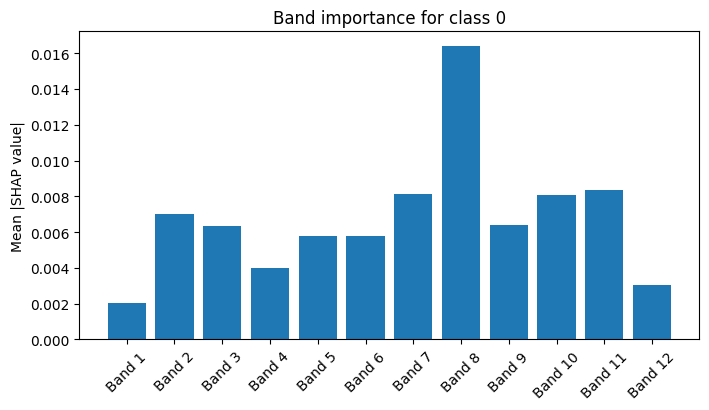

In [ ]:
# Remove chi·ªÅu d∆∞ (n·∫øu c√≥)
shap_array = np.array(shap_values[0])
shap_array = np.squeeze(shap_array)  # (12, 224, 224)
print("shap_array shape:", shap_array.shape)

# T√≠nh mean SHAP value theo H, W
mean_shap_per_band = np.abs(shap_array).mean(axis=(1, 2))  # shape (12,)
print("mean_shap_per_band shape:", mean_shap_per_band.shape)

# V·∫Ω bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_shap_per_band)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean |SHAP value|')
plt.title(f'Band importance for class {class_idx}')
plt.show()


Glyph 128293 (\N{FIRE}) missing from current font.
Glyph 128293 (\N{FIRE}) missing from current font.


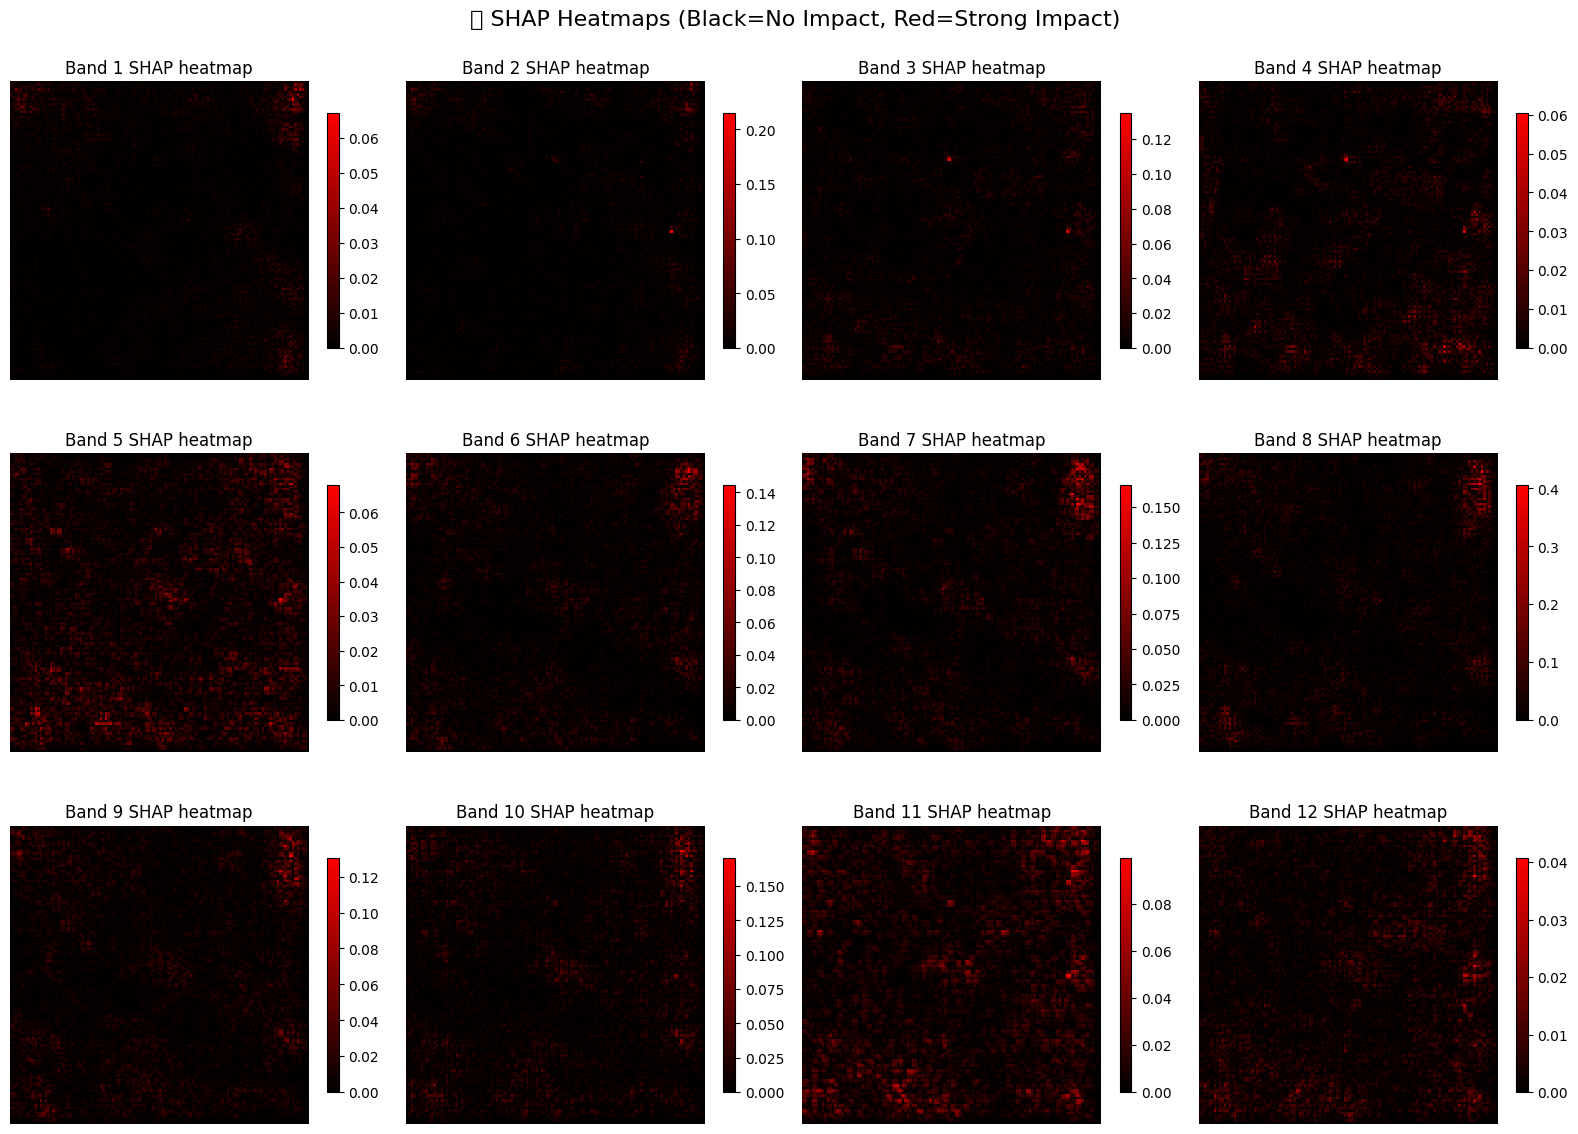

In [ ]:
import matplotlib.colors as mcolors

# L·∫•y array t·ª´ shap_values
shap_array = shap_values[0]  # shape: (12, H, W)

# T·∫°o custom colormap: black (0) -> red (high)
cmap = mcolors.LinearSegmentedColormap.from_list("black_red", ["black", "red"])

# Hi·ªÉn th·ªã heatmap cho t·ª´ng band
num_bands = shap_array.shape[0]
fig, axes = plt.subplots(3, 4, figsize=(16, 12))  # 3 rows x 4 cols
axes = axes.flatten()

for i in range(num_bands):
    ax = axes[i]
    heatmap = np.abs(shap_array[i])  # l·∫•y tr·ªã tuy·ªát ƒë·ªëi cho impact

    im = ax.imshow(heatmap, cmap=cmap, interpolation='nearest')
    ax.set_title(f"Band {i+1} SHAP heatmap", fontsize=12)
    ax.axis('off')
    fig.colorbar(im, ax=ax, shrink=0.6)

plt.suptitle("üî• SHAP Heatmaps (Black=No Impact, Red=Strong Impact)", fontsize=16)
plt.tight_layout()
plt.show()


üî• Band 8 c√≥ mean |SHAP| cao nh·∫•t


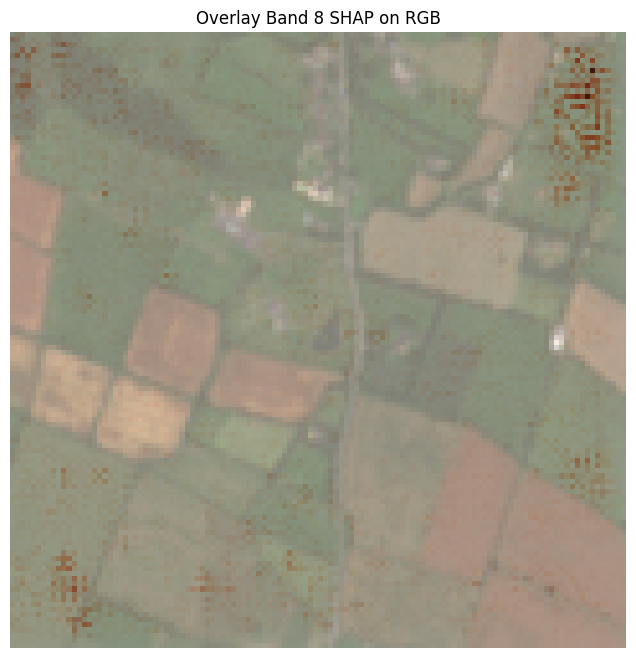

In [ ]:
# ‚úÖ L·∫•y ·∫£nh g·ªëc
image_np = test_imgs.squeeze().cpu().numpy().transpose(1, 2, 0)  # (H, W, C)
rgb = image_np[:, :, [3, 2, 1]]  # Bands 4,3,2 (g·∫ßn gi·ªëng RGB)
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)  # scale v·ªÅ [0,1]

# ‚úÖ T√¨m band c√≥ mean |SHAP| cao nh·∫•t
mean_shap_per_band = np.abs(shap_array).mean(axis=(1, 2))  # shape (12,)
top_band_idx = np.argmax(mean_shap_per_band)
print(f"üî• Band {top_band_idx+1} c√≥ mean |SHAP| cao nh·∫•t")

# ‚úÖ L·∫•y heatmap c·ªßa band ƒë√≥ v√† scale
heatmap = np.abs(shap_array[top_band_idx])  # (H, W)
heatmap_norm = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min() + 1e-6)  # scale 0-1

# ‚úÖ Overlay heatmap l√™n ·∫£nh g·ªëc
plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.imshow(heatmap_norm, cmap="Reds", alpha=0.5)  # alpha=0.5 ƒë·ªÉ th·∫•y ·∫£nh g·ªëc
plt.axis('off')
plt.title(f"Overlay Band {top_band_idx+1} SHAP on RGB")
plt.show()
